In [928]:
# import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

# Data Preparation

## Data Loading

In [929]:
df = pd.read_csv('/Users/lukastillmann/Desktop/datasets/newspaper/archive/Lead Scoring.csv')

In [930]:
df.shape

(9240, 37)

In [931]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Data Inspection

In [932]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [933]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [934]:
df["Prospect ID"].duplicated().sum()

0

## Data Cleaning

In [935]:
# replace "Select" Values with NaN
df.replace("Select", np.nan, inplace=True)

<Axes: >

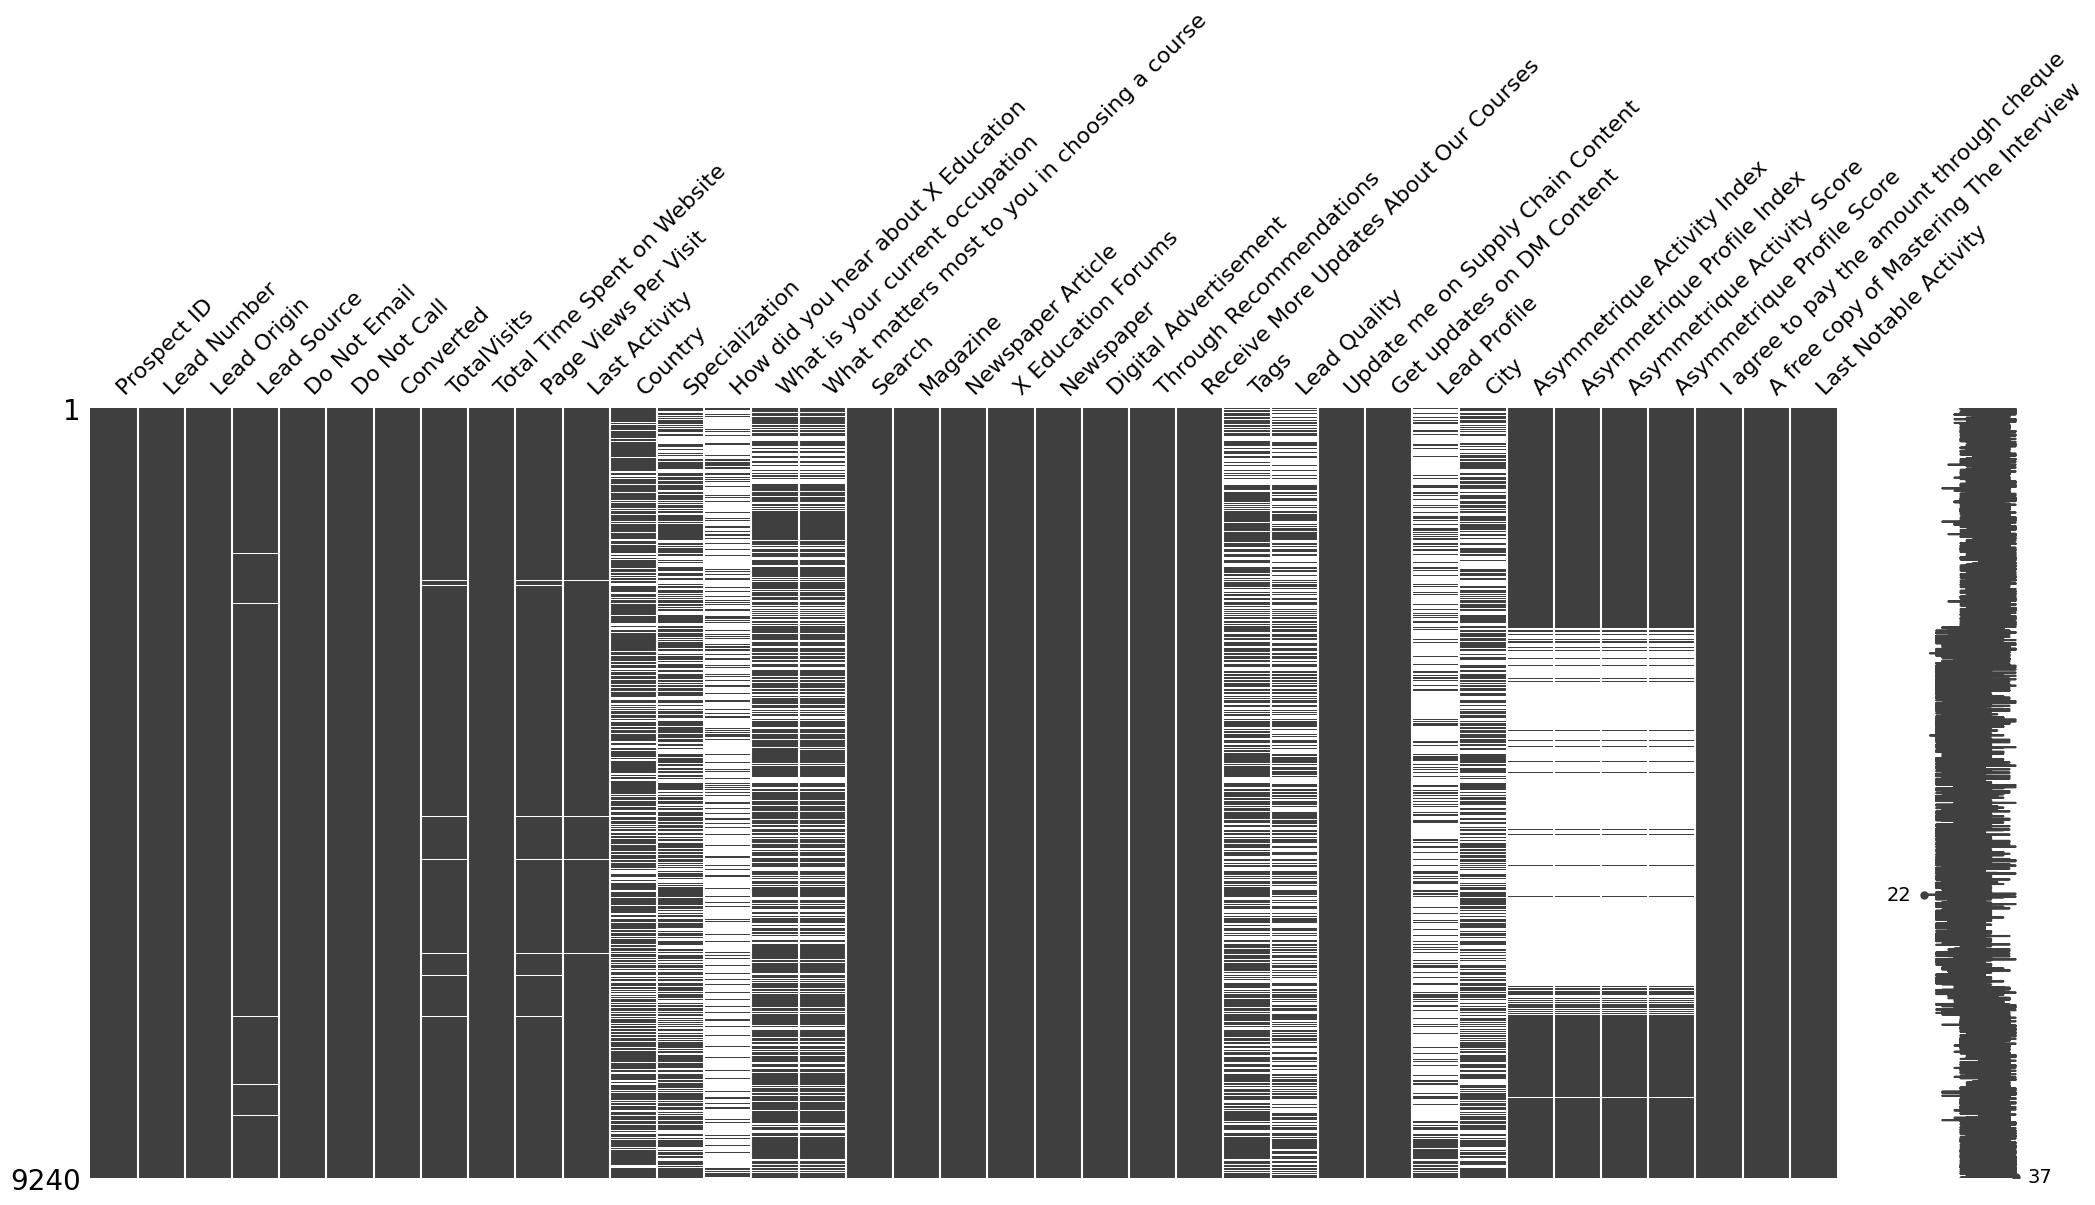

In [936]:
# visualize missing values
msno.matrix(df)

In [937]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [938]:
# drop columns with less than 70 percent values present
df.dropna(thresh=len(df)*0.3, axis=1, inplace=True)

In [939]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [940]:
# inspect NaN columsn one by one

In [941]:
# lead source
df["Lead Source"].describe()

count       9204
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

<Axes: xlabel='count', ylabel='Lead Source'>

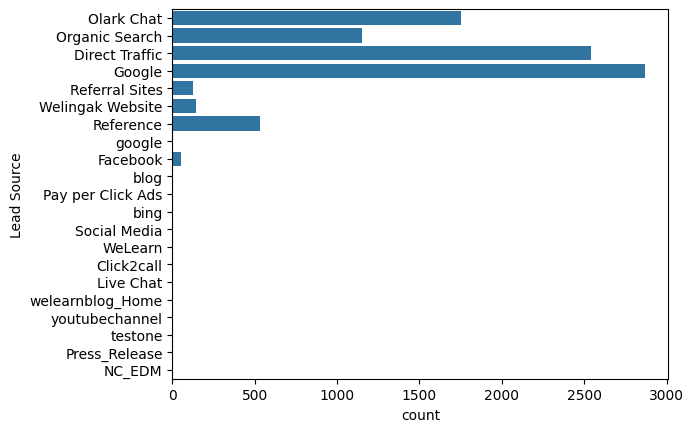

In [942]:
sns.countplot(df["Lead Source"])

In [943]:
# impute missing values with google
df["Lead Source"] = df["Lead Source"].replace(np.nan, "Google")
# replace "google" with "Google"
df["Lead Source"] = df["Lead Source"].replace("google", "Google")

In [944]:
df["Lead Source"].isnull().sum()

0

In [945]:
# total visits
df.TotalVisits.describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

<Axes: xlabel='TotalVisits', ylabel='Count'>

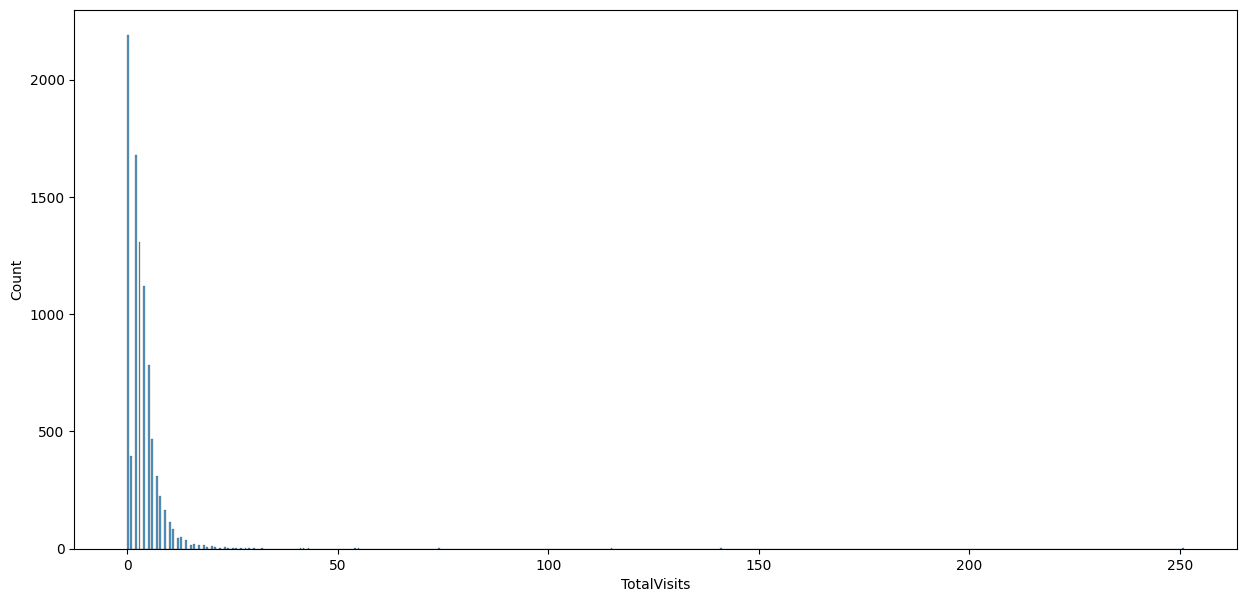

In [946]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.histplot(df["TotalVisits"], ax=ax)

In [947]:
# we can see most total visits are between 0 and 30, average between 3 and 4 site visits

In [948]:
# replace nan values with 3 and convert to int
df["TotalVisits"] = df["TotalVisits"].replace(np.nan, 3).astype(int)

In [949]:
df["TotalVisits"].isnull().sum()

0

In [950]:
# Page Views Per Visit
df["Page Views Per Visit"].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<Axes: xlabel='Page Views Per Visit', ylabel='Count'>

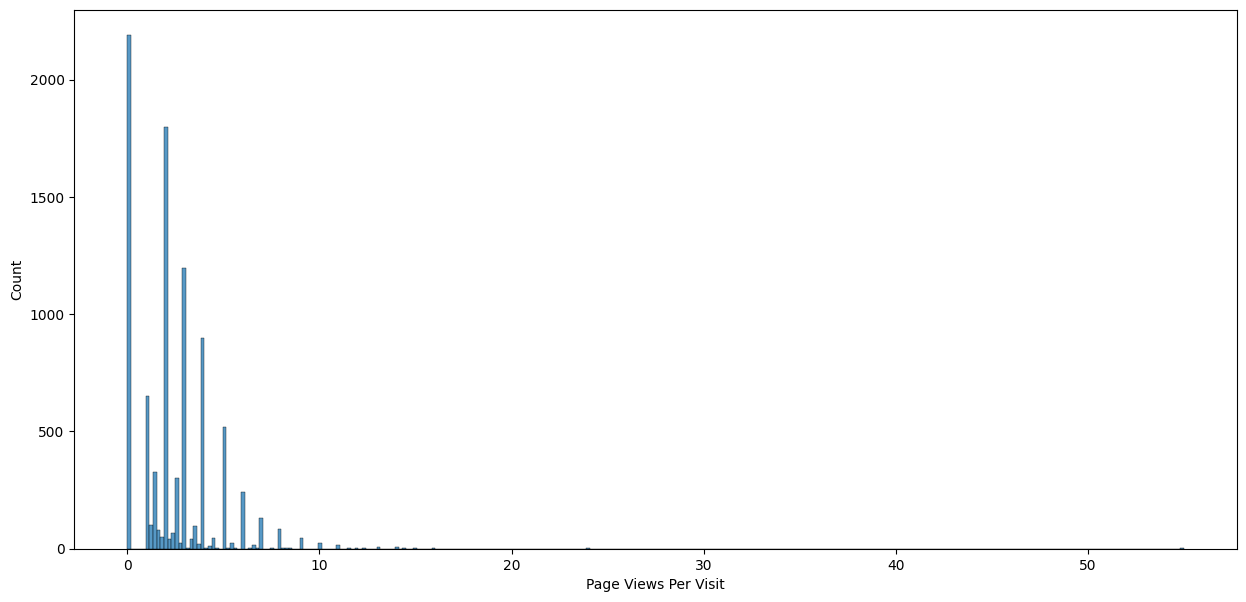

In [951]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.histplot(df["Page Views Per Visit"], ax=ax)

In [952]:
# most values between 1 and 10, mean at around 2

In [953]:
# replace nan values with 2 and convert to int
df["Page Views Per Visit"] = df["Page Views Per Visit"].replace(np.nan, 2).astype(int)

In [954]:
df["Page Views Per Visit"].isnull().sum()

0

In [955]:
# Last Activity
df["Last Activity"].describe()

count             9137
unique              17
top       Email Opened
freq              3437
Name: Last Activity, dtype: object

<Axes: xlabel='count', ylabel='Last Activity'>

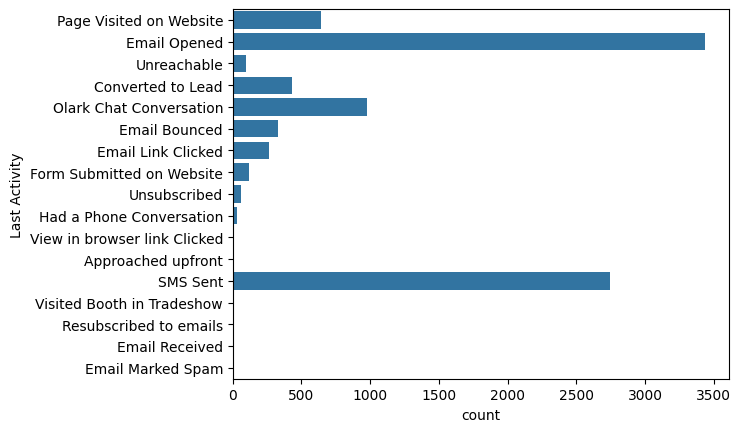

In [956]:
sns.countplot(df["Last Activity"])

In [957]:
df["Last Activity"] = df["Last Activity"].replace(np.nan, "Email Opened")

In [958]:
df["Last Activity"].isnull().sum()

0

In [959]:
# Country
df["Country"].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

<Axes: xlabel='count', ylabel='Country'>

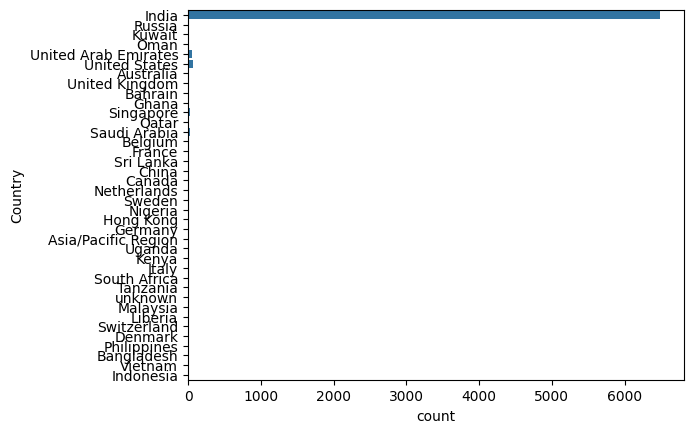

In [960]:
sns.countplot(df["Country"])

In [961]:
# we see india is most present and we have a lot of values missing, therfore we drop the country column as it is not very informative

In [962]:
# Specialization
df["Specialization"].describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [963]:
df["Specialization"].head()

0                        NaN
1                        NaN
2    Business Administration
3      Media and Advertising
4                        NaN
Name: Specialization, dtype: object

<Axes: xlabel='count', ylabel='Specialization'>

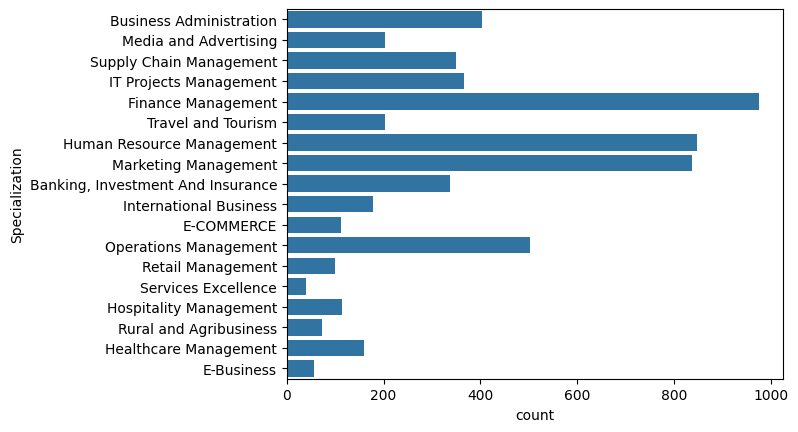

In [964]:
sns.countplot(df["Specialization"])

In [965]:
# we have a lot of missing values, which likely originate from that the lead has not yet selected a Specialization.
# hence, we opt to create an additional category "miscellaneous"
df["Specialization"] = df["Specialization"].replace(np.nan, "Miscellaneous")

<Axes: xlabel='count', ylabel='What is your current occupation'>

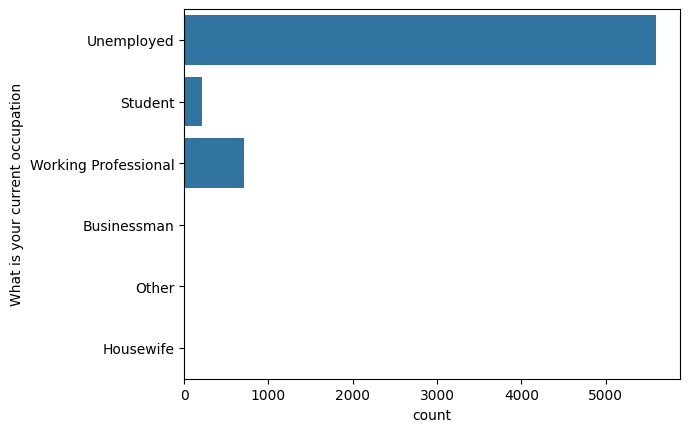

In [966]:
# What is your current occupation
sns.countplot(df["What is your current occupation"])

In [967]:
# impute Unemployers for NaN values 
df["What is your current occupation"] = df["What is your current occupation"].replace(np.nan, "Unemployed")

In [968]:
df["What is your current occupation"].isnull().sum()

0

<Axes: xlabel='count', ylabel='What matters most to you in choosing a course'>

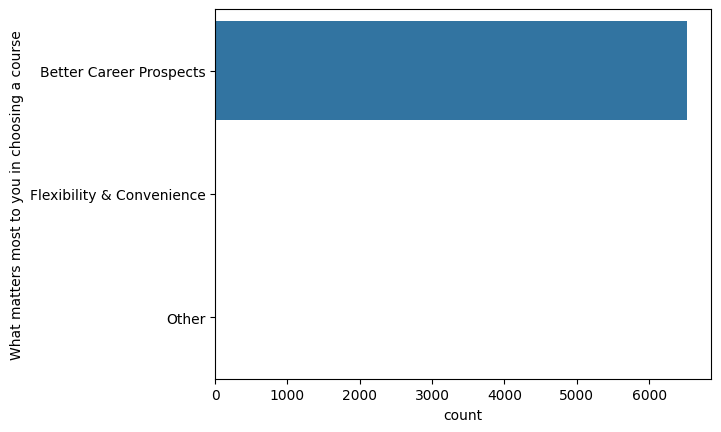

In [969]:
# What matters most to you in choosing a course
sns.countplot(df["What matters most to you in choosing a course"])

<Axes: xlabel='count', ylabel='Tags'>

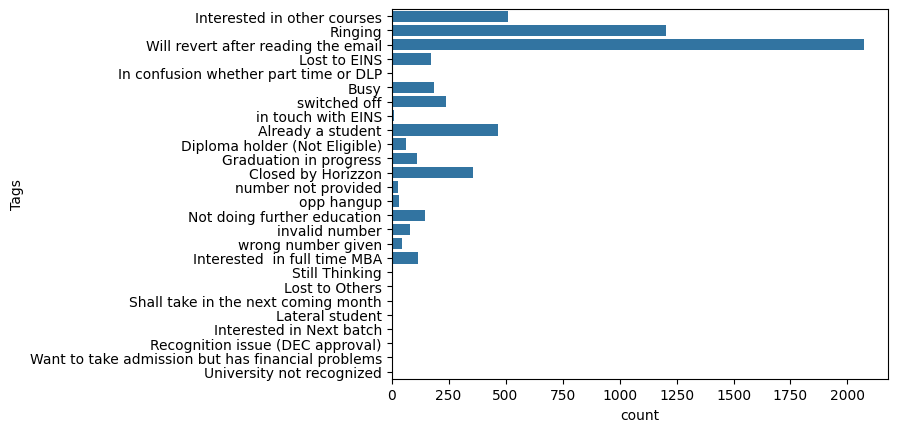

In [970]:
# Tags
sns.countplot(df["Tags"])

In [971]:
df["Tags"] = df["Tags"].replace(np.nan, "Will revert after reading the email")

<Axes: xlabel='count', ylabel='Lead Quality'>

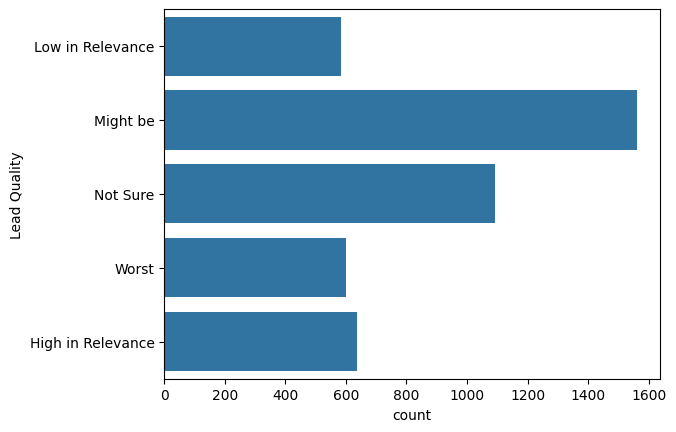

In [972]:
# Lead Quality
sns.countplot(df["Lead Quality"])

In [973]:
# impute missing values with "Not sure", as this makes the most sense semantically
df["Lead Quality"] = df["Lead Quality"].replace(np.nan, "Not Sure")

<Axes: xlabel='count', ylabel='City'>

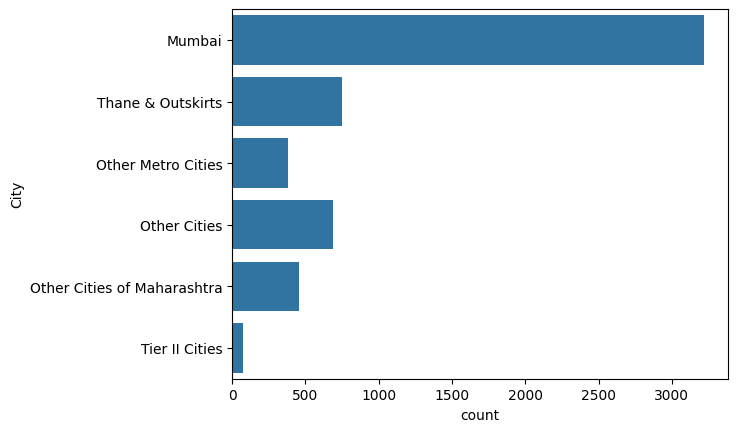

In [974]:
# City
sns.countplot(df["City"])

In [975]:
# as Mumbai is the most common city, we will impute msissing values with it
df["City"] = df["City"].replace(np.nan, "Mumbai")

<Axes: xlabel='count', ylabel='Asymmetrique Activity Index'>

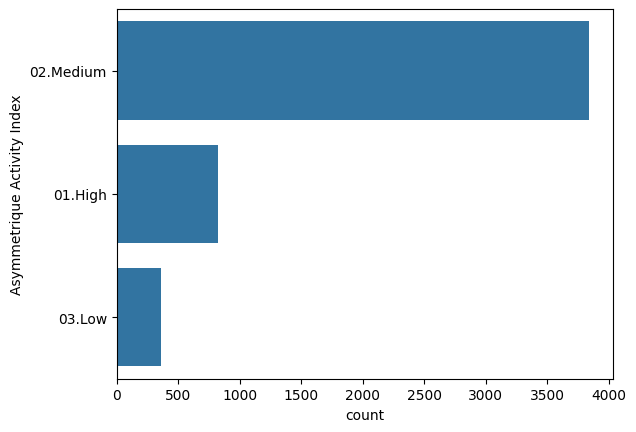

In [976]:
sns.countplot(df["Asymmetrique Activity Index"])

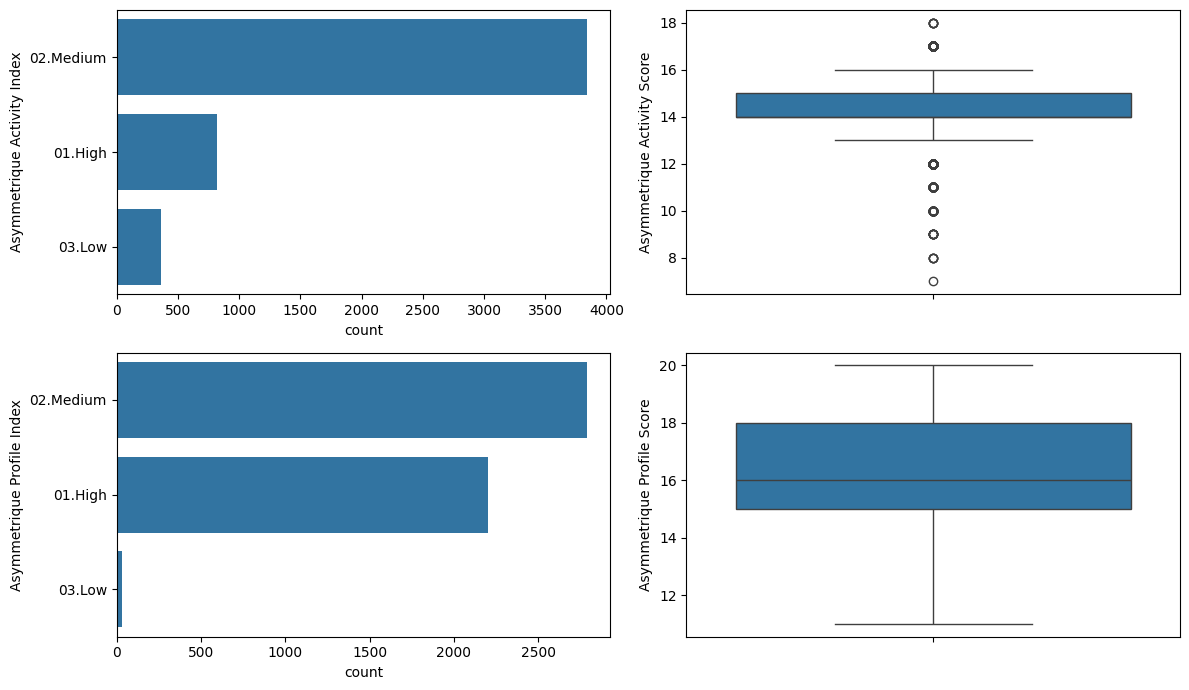

In [977]:
# Asymmetrique Columns
fig, axs = plt.subplots(2, 2, figsize = (12, 7))
plt1 = sns.countplot(df["Asymmetrique Activity Index"], ax = axs[0, 0])
plt2 = sns.boxplot(df["Asymmetrique Activity Score"], ax = axs[0, 1])
plt3 = sns.countplot(df["Asymmetrique Profile Index"], ax = axs[1, 0])
plt4 = sns.boxplot(df["Asymmetrique Profile Score"], ax = axs[1, 1])
plt.tight_layout()



In [978]:
# we have a lot of missing values and it is difficult to impute them a stheir ist too much variation and not semantically logical way to do so
# therefore, we drop those columns
df = df.drop(columns=["Asymmetrique Activity Index", "Asymmetrique Activity Score", "Asymmetrique Profile Index", "Asymmetrique Profile Score"], axis=1)

In [979]:
# check again for null values
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                          2461
Specialization                                      0
What is your current occupation                     0
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

# Data Exploration

## Univariate Analysis

In [980]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Target Variable

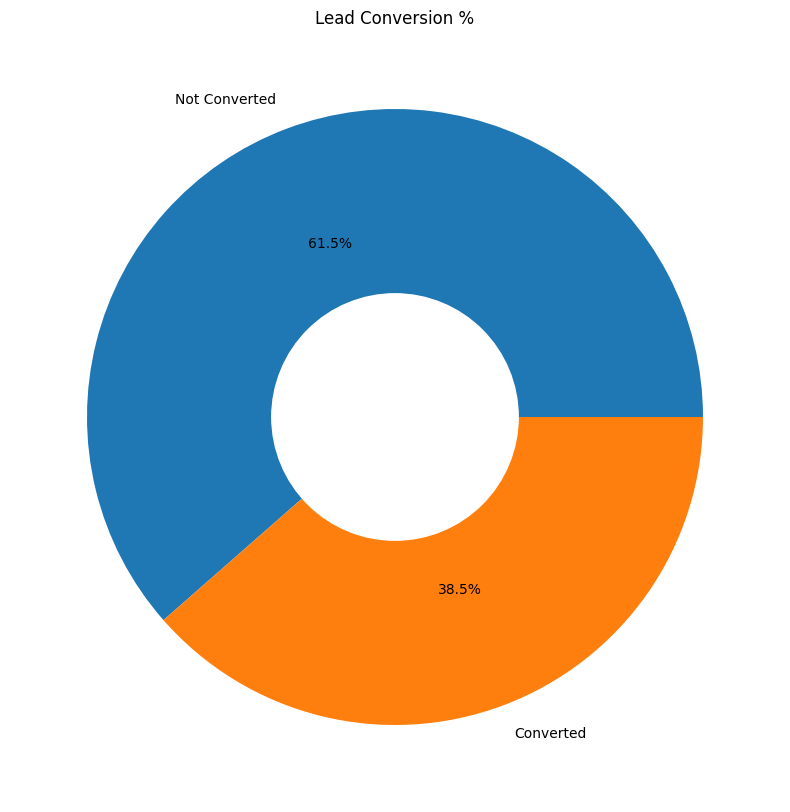

In [981]:
# Target variable "Conversion"; Converted (1) or Not Converted (0)
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(df["Converted"].value_counts(), labels=["Not Converted", "Converted"], autopct='%1.1f%%')
cir = plt.Circle((0, 0), .4, color='white')
ax.add_patch(cir)
plt.title("Lead Conversion %")
plt.show()

### Independent Variables

<Axes: xlabel='Lead Origin', ylabel='count'>

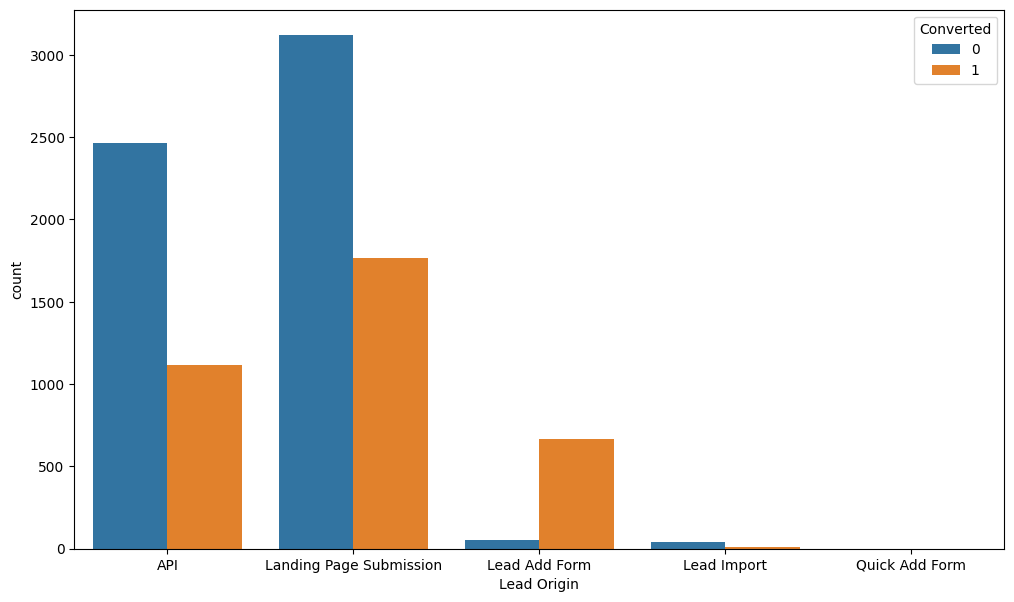

In [982]:
# Lead Origin
fig= plt.figure(figsize=(12,7))
sns.countplot(x="Lead Origin", hue="Converted", data=df)


In [983]:
# we can see that most leads (absolute) stem from the API and Landing Page
# However, most conversions (in relation to lead origin) originate from the Lead Add Form

# 2 Takeaways:
# 1. Improve Conversion Rate for API and Landing Page Submission
# 2. Improve Leads from Lead Add Form

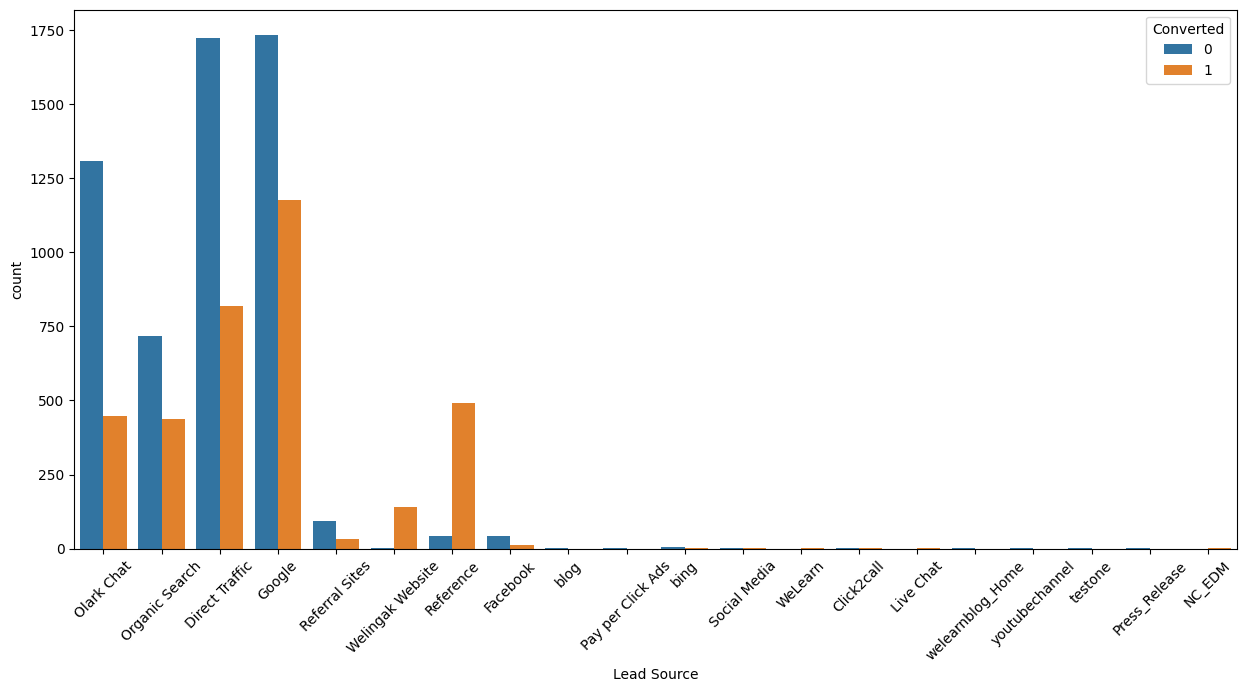

In [984]:
# Lead Source
fig= plt.figure(figsize=(15,7))
sns.countplot(data=df, x="Lead Source", hue="Converted")
plt.xticks(rotation=45)
plt.show()

In [985]:
# most important lead sources are Google, Direct Traffic, Olark Chat, Organic Search and Refferals and Welingak Website
# Conversion Rate is highest (relative) for Refferals and Welingak Website 

# Again, 2 Takeaways:
# 1. Focus on improving Coversion Rate for Google, Direct Traffic, Olark Chat, Organic Search
# 2. Focus on improving Leda Sources from Refernces and Welingak Website

<Axes: xlabel='Do Not Email', ylabel='count'>

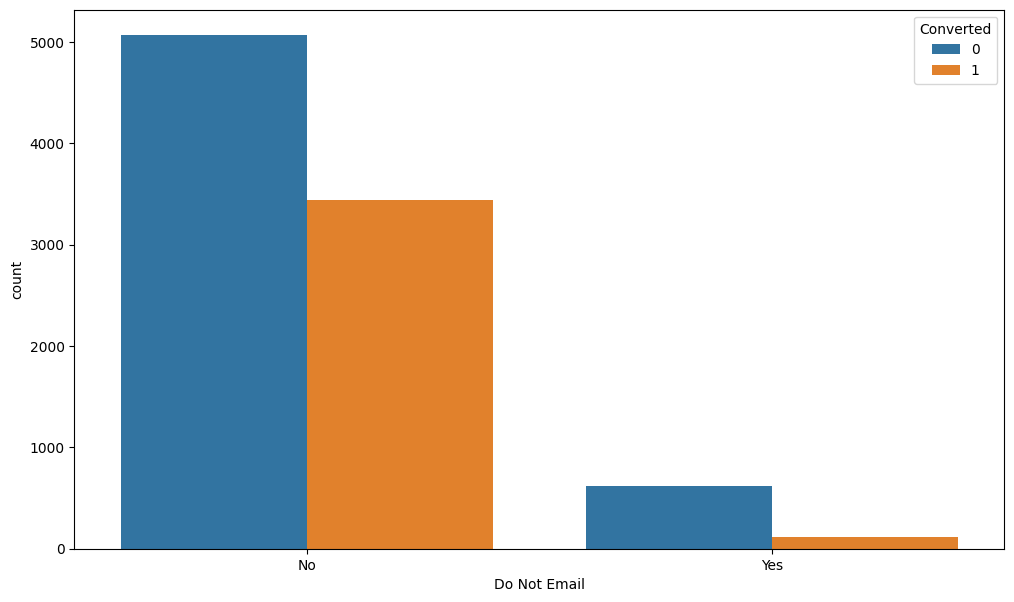

In [986]:
# Do Not Email
fig= plt.figure(figsize=(12,7))
sns.countplot(x="Do Not Email", hue="Converted", data=df)

<Axes: xlabel='Do Not Call', ylabel='count'>

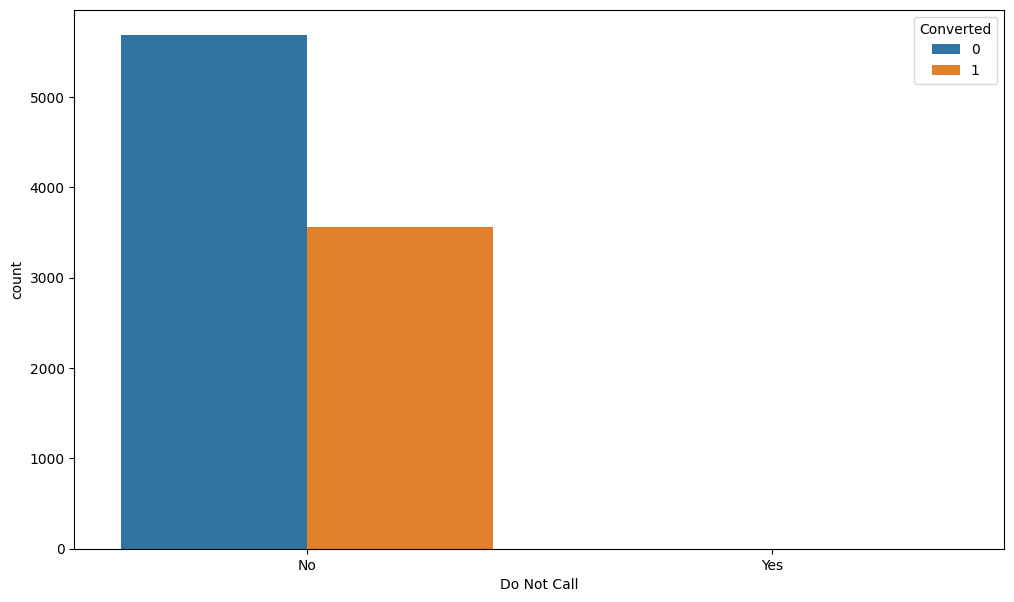

In [987]:
# Do Not Call
fig= plt.figure(figsize=(12,7))
sns.countplot(x="Do Not Call", hue="Converted", data=df)

<Axes: xlabel='TotalVisits', ylabel='count'>

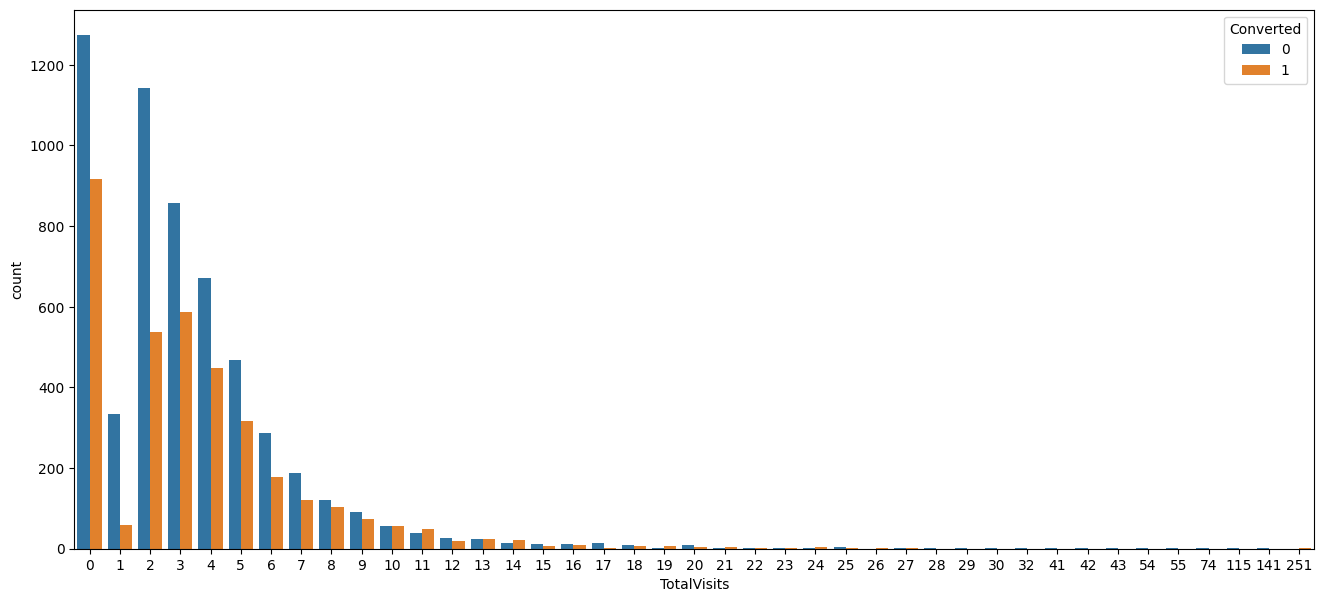

In [988]:
# TotalVisits
fig, ax = plt.subplots(figsize=(16, 7))
sns.countplot(data=df, x="TotalVisits", hue="Converted", ax=ax)

<Axes: xlabel='Total Time Spent on Website', ylabel='Count'>

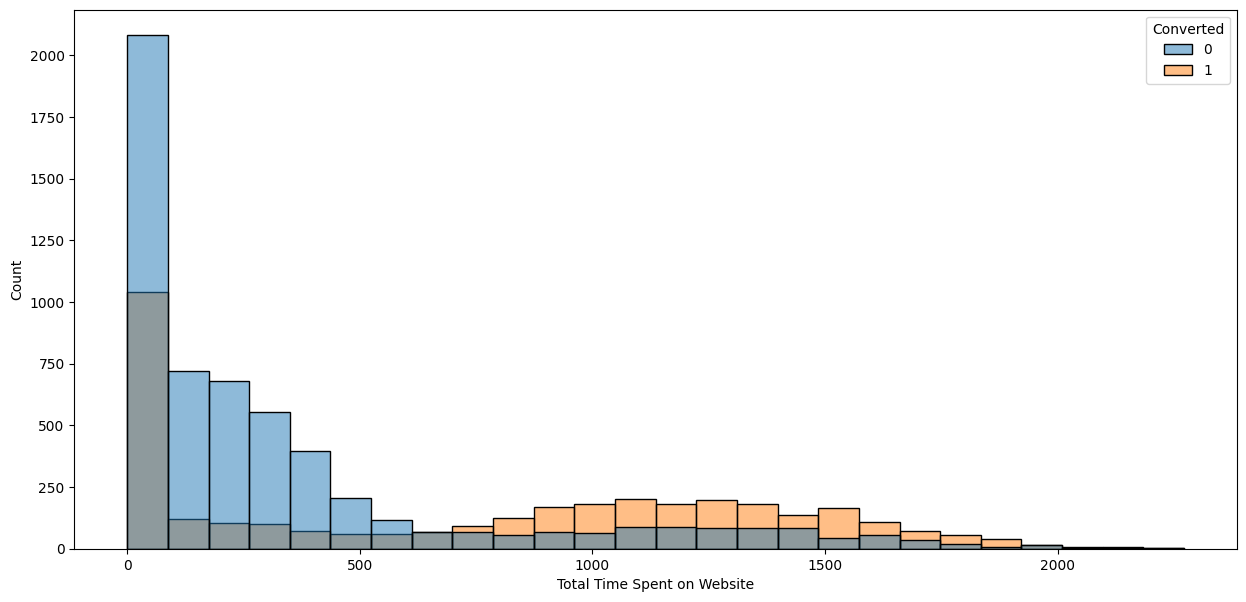

In [989]:
# Total Time Spent on Website
fig, ax = plt.subplots(figsize=(15, 7))
sns.histplot(data=df, x="Total Time Spent on Website", hue="Converted")

In [990]:
# we can see that generally speaking, the more time spent on the website, the higher the conversion rate
# though, most leads only remain for a short time on the website
# Takeaway: Increase lead retention on the website to more than 700 seconds, best around 1100

(0.0, 30.0)

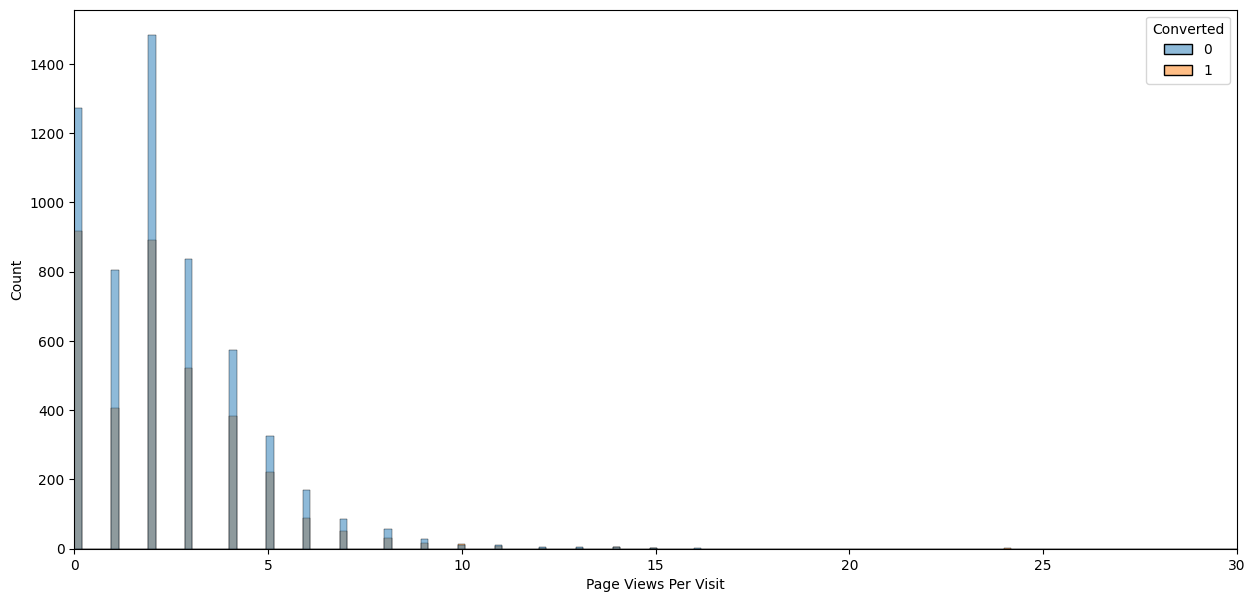

In [991]:
# Page Views Per Visit
fig, ax = plt.subplots(figsize=(15, 7))
sns.histplot(data=df, x="Page Views Per Visit", hue="Converted")
plt.xlim(0, 30)

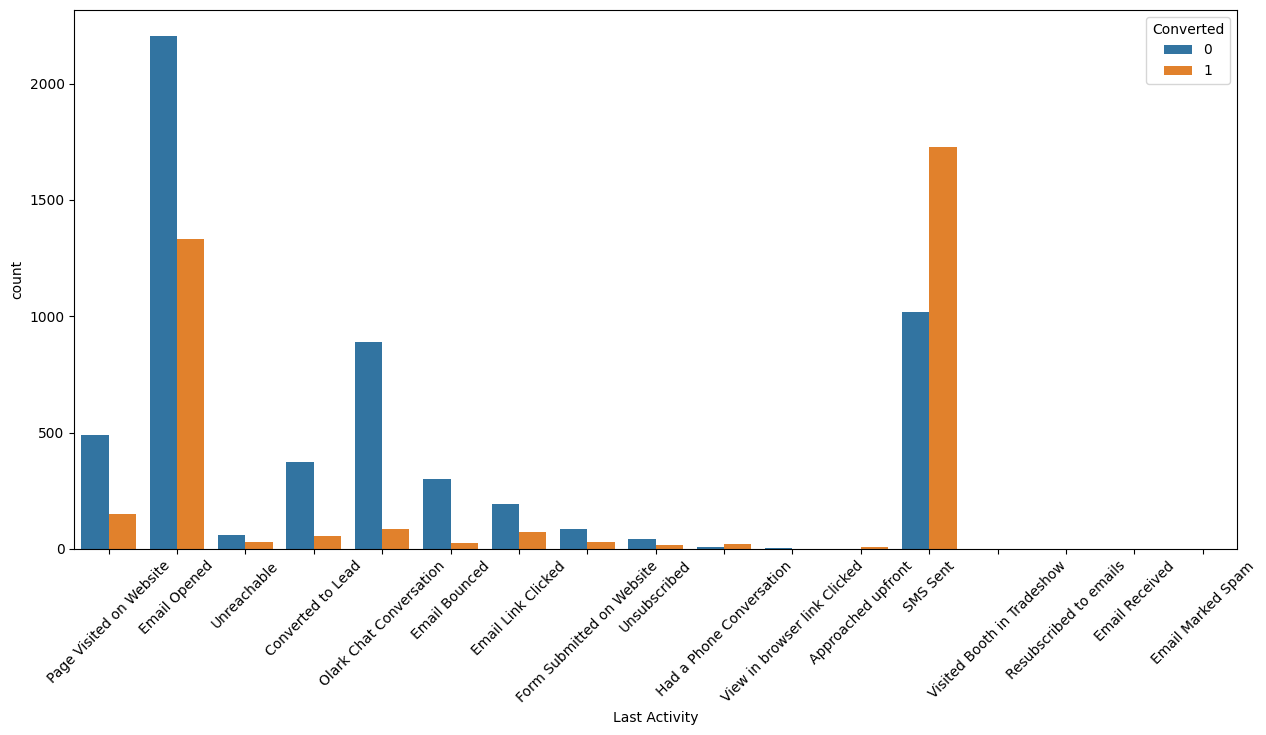

In [992]:
# Last Activity
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(data=df, x="Last Activity", hue="Converted")
plt.xticks(rotation=45)
plt.show()

In [993]:
# 2 Takeaways:

# 1. Improve Conversion Rate for Emails Opened, a sthis is by far the most common last acitivity
# 2. Increase SMS sent, as this activity has by far the best Conversion Rate.

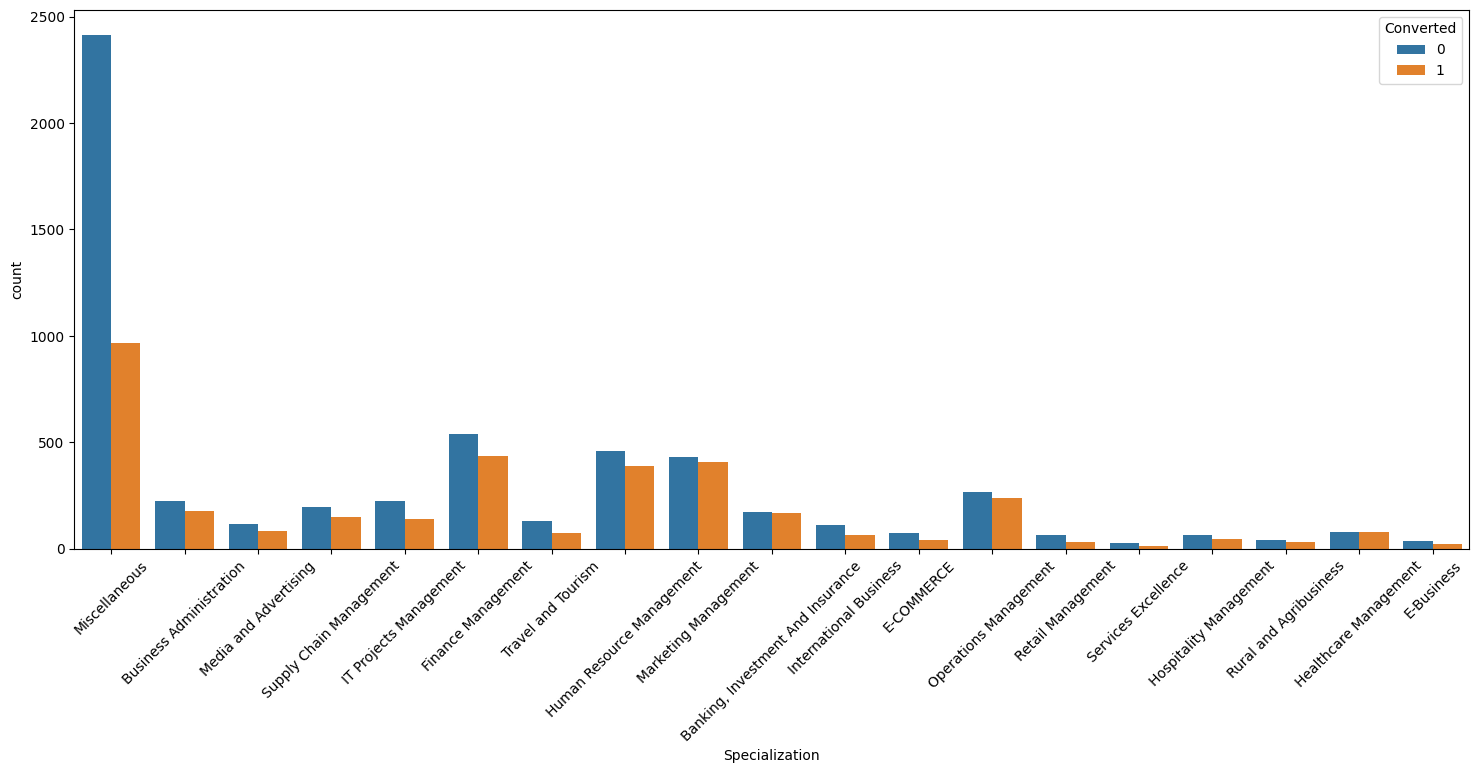

In [994]:
# Specialization
fig, ax = plt.subplots(figsize=(18, 7))
sns.countplot(data=df, x="Specialization", hue="Converted")
plt.xticks(rotation=45)
plt.show()

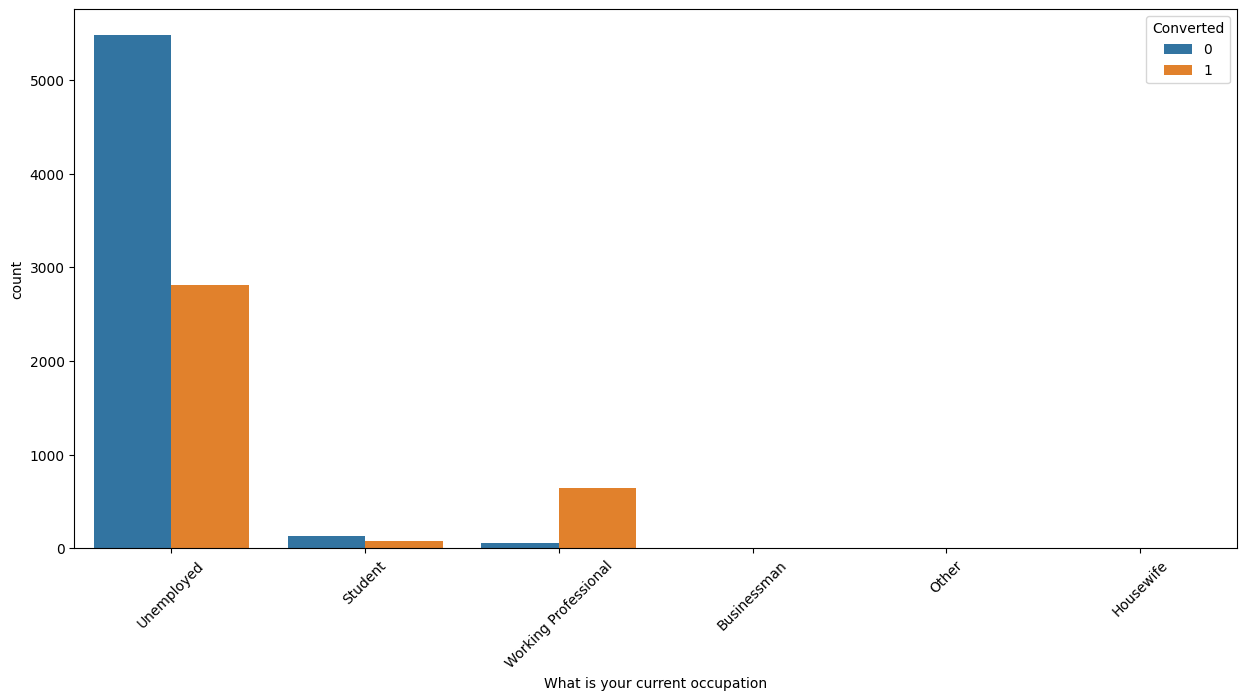

In [995]:
# What is your current occupation
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(data=df, x="What is your current occupation", hue="Converted")
plt.xticks(rotation=45)
plt.show()

In [996]:
# focus on impriving conversions for unemployed leads
# try to attract more working professionals

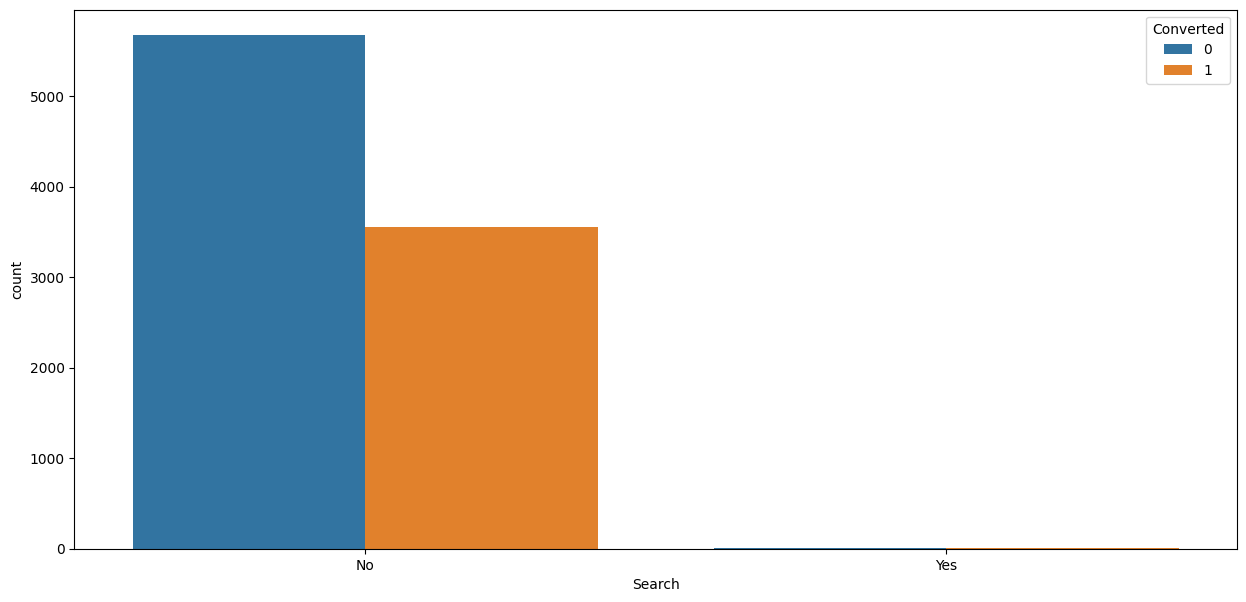

In [997]:
# Search
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(data=df, x="Search", hue="Converted")
plt.show()

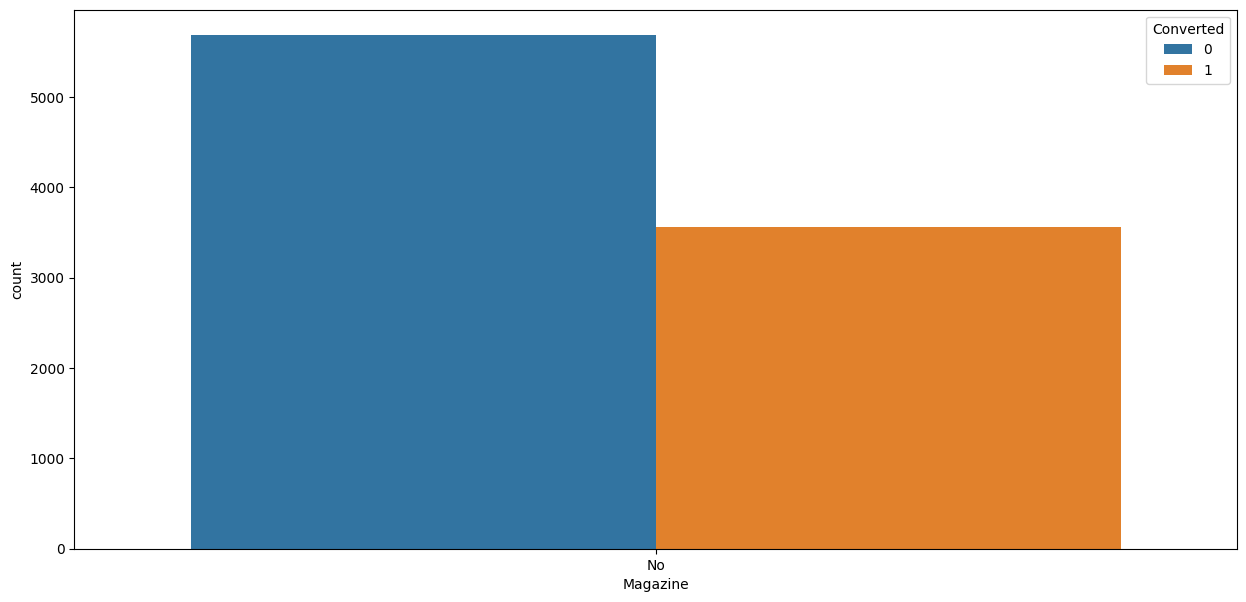

In [998]:
# Magazine
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(data=df, x="Magazine", hue="Converted")
plt.show()

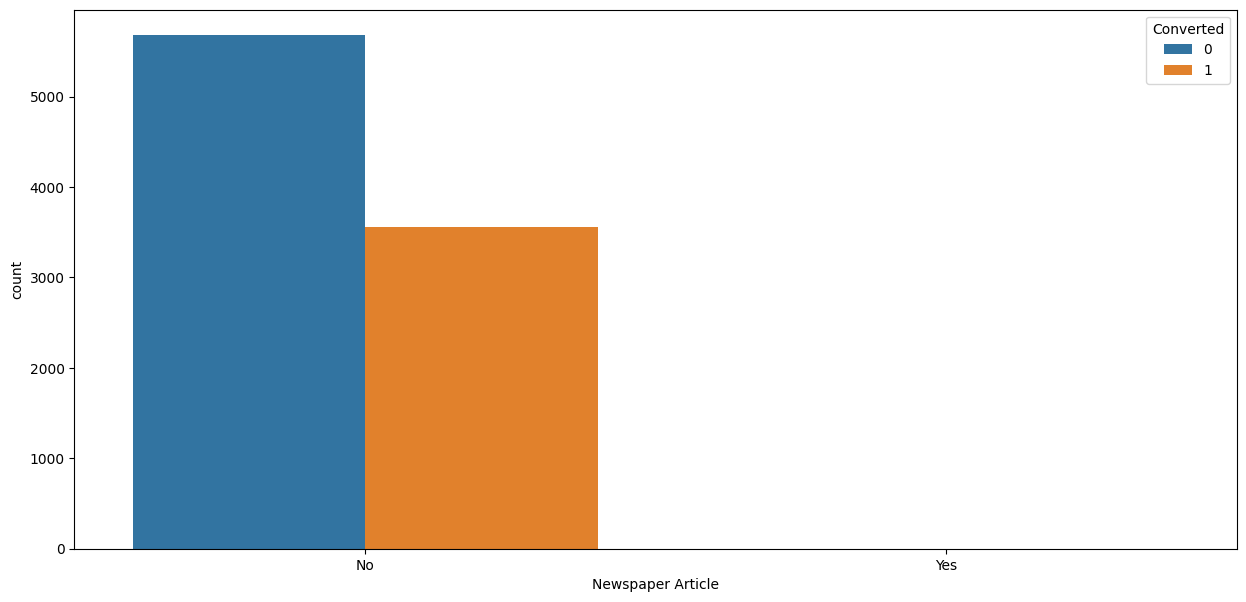

In [999]:
# Newspaper Article
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(data=df, x="Newspaper Article", hue="Converted")
plt.show()

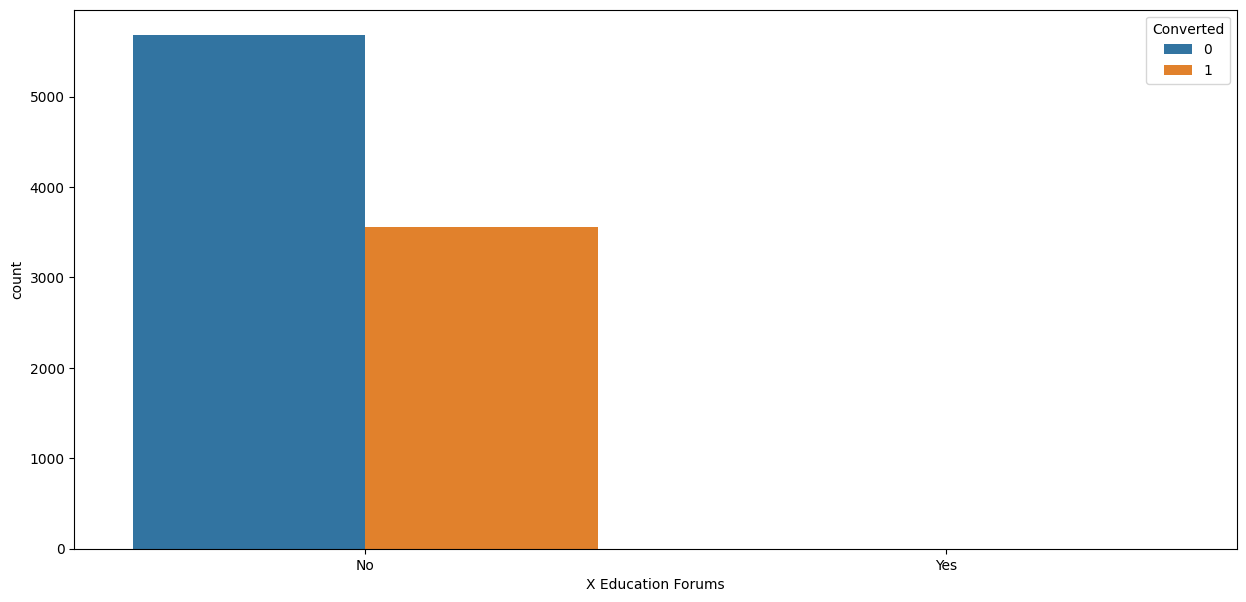

In [1000]:
# X Education Forums
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(data=df, x="X Education Forums", hue="Converted")
plt.show()

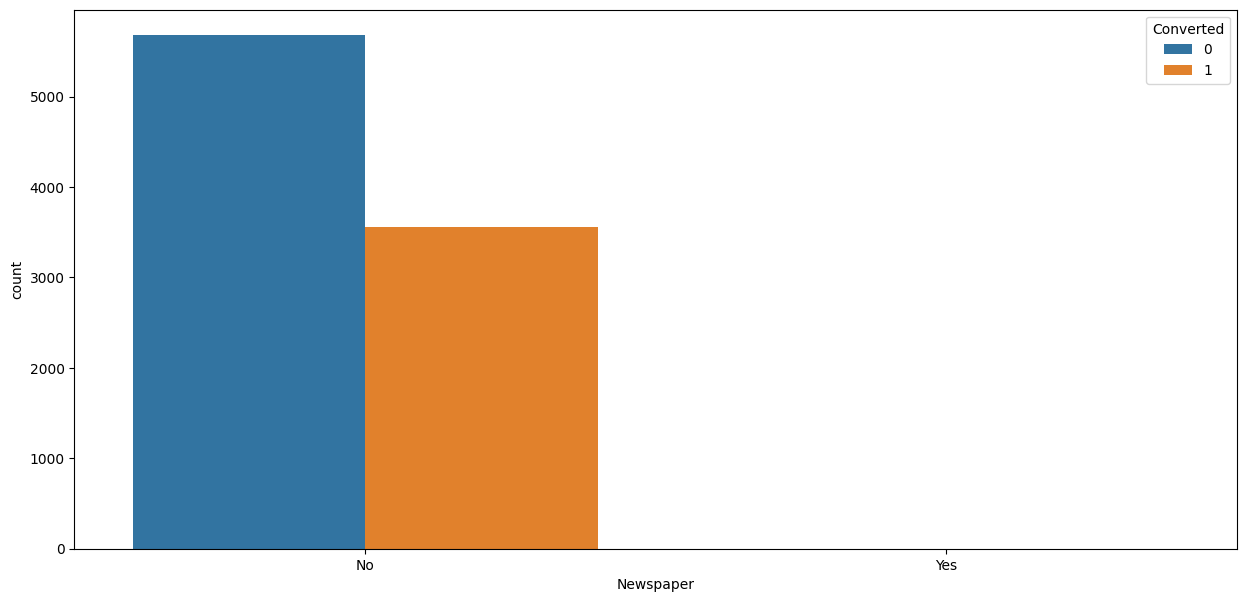

In [1001]:
# Newspaper
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(data=df, x="Newspaper", hue="Converted")
plt.show()

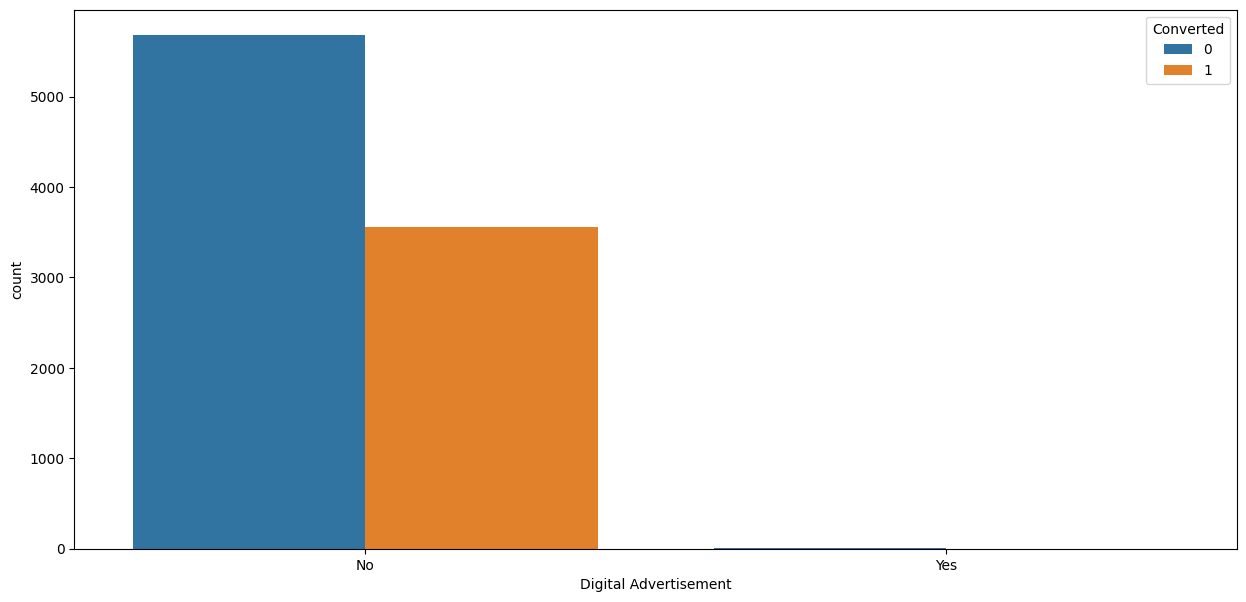

In [1002]:
# Digital Advertisement
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(data=df, x="Digital Advertisement", hue="Converted")
plt.show()

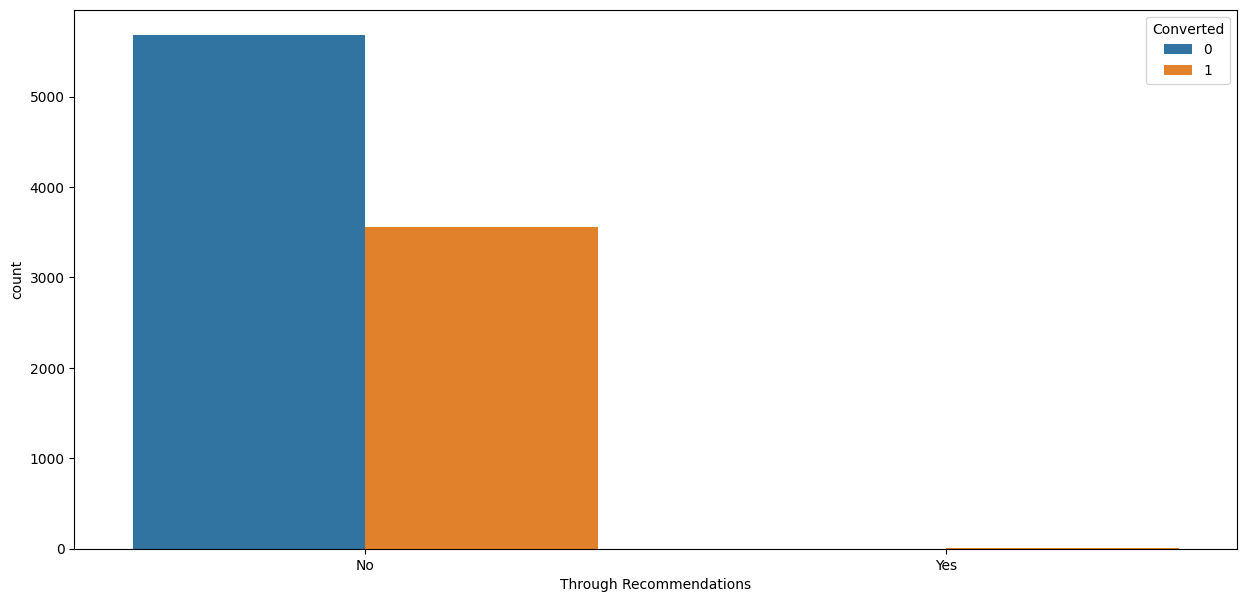

In [1003]:
# Through Recommendations
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(data=df, x="Through Recommendations", hue="Converted")
plt.show()

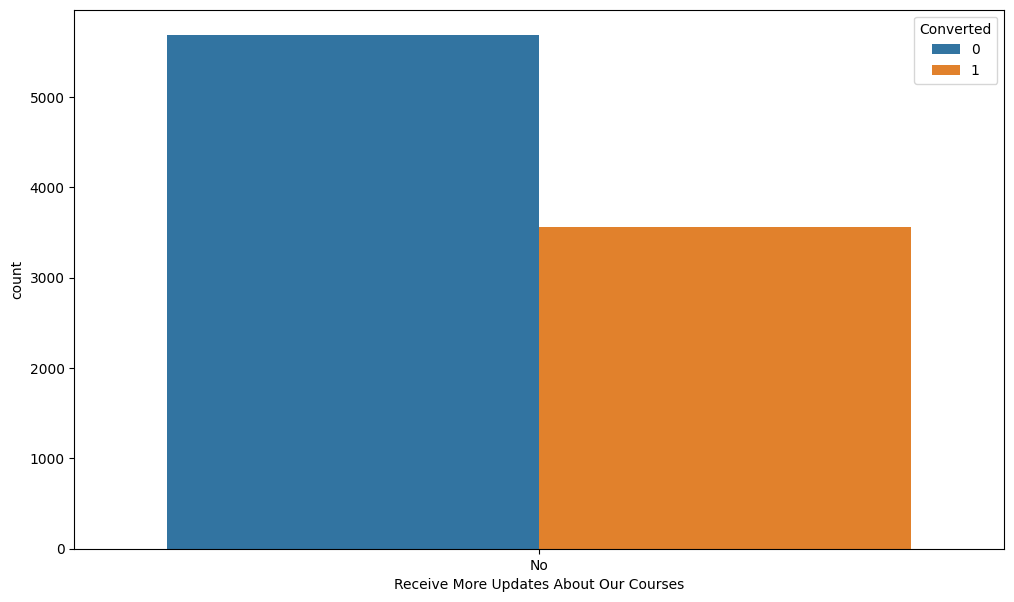

In [1004]:
# Receive More Updates About Our Courses
fig, ax = plt.subplots(figsize=(12, 7))
sns.countplot(data=df, x="Receive More Updates About Our Courses", hue="Converted")
plt.show()

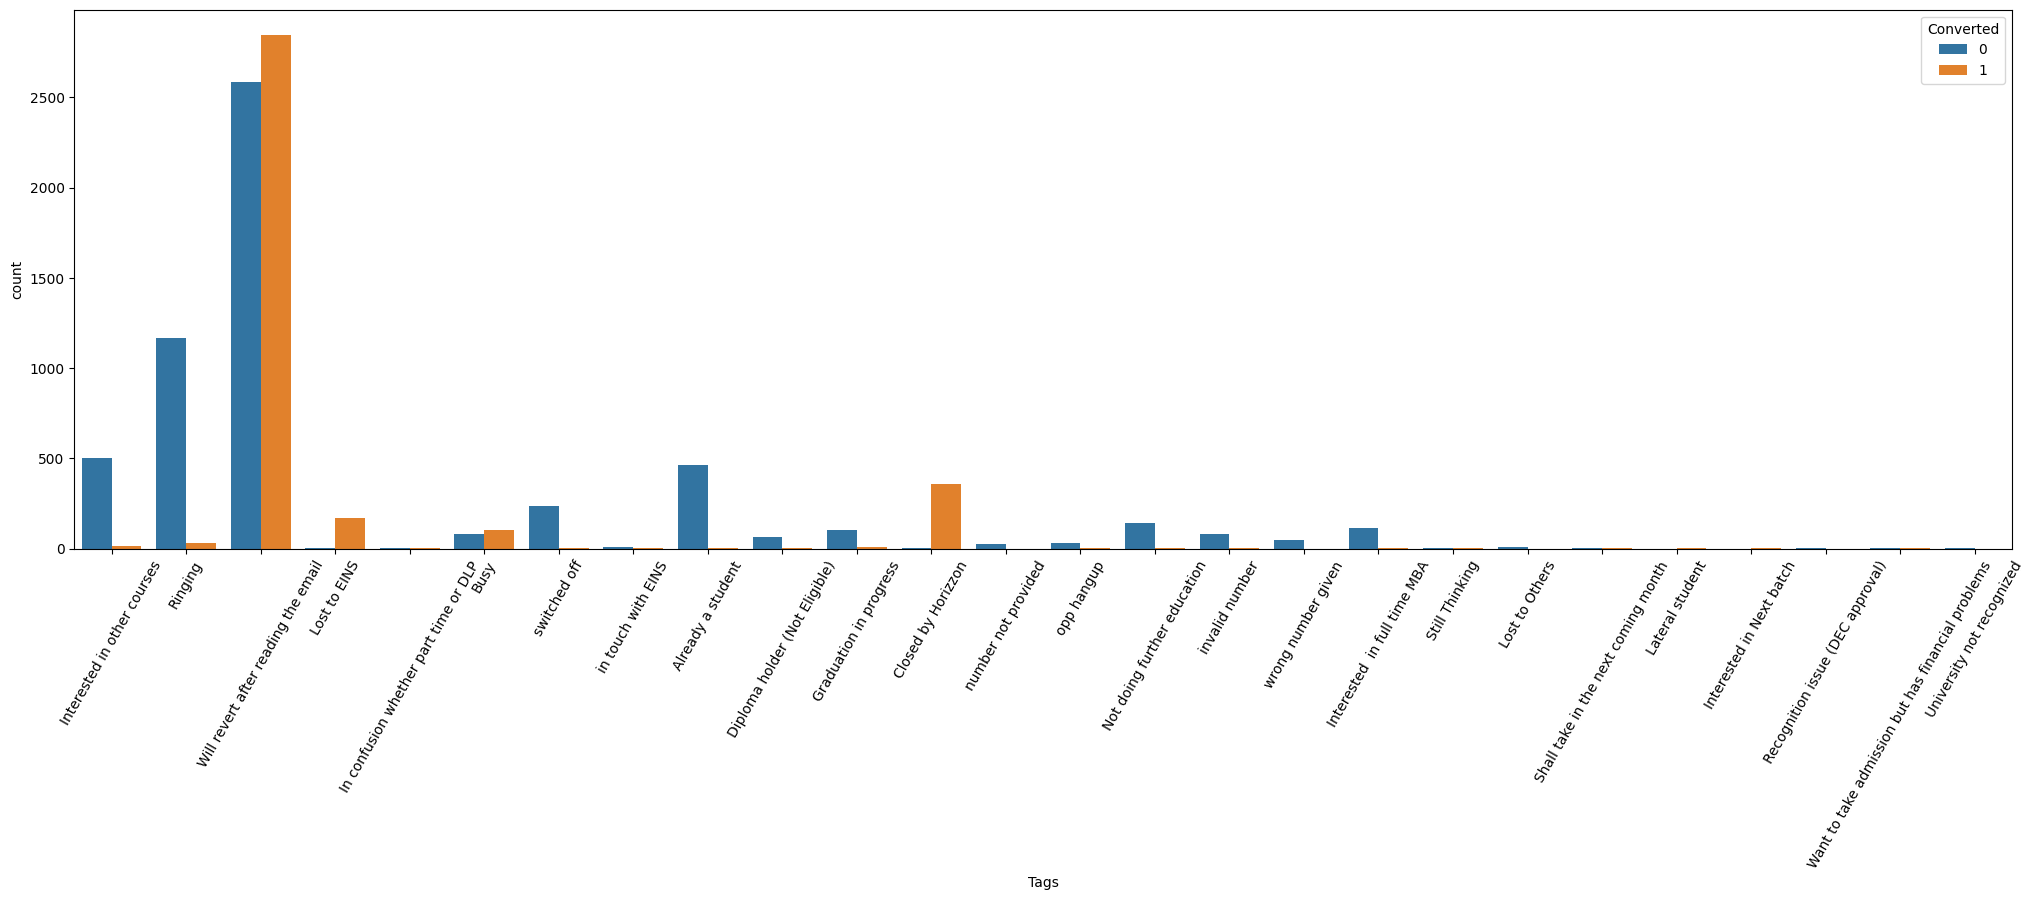

In [1005]:
# Tags
fig, ax = plt.subplots(figsize=(25, 7))
sns.countplot(data=df, x="Tags", hue="Converted")
plt.xticks(rotation=60)
plt.show()

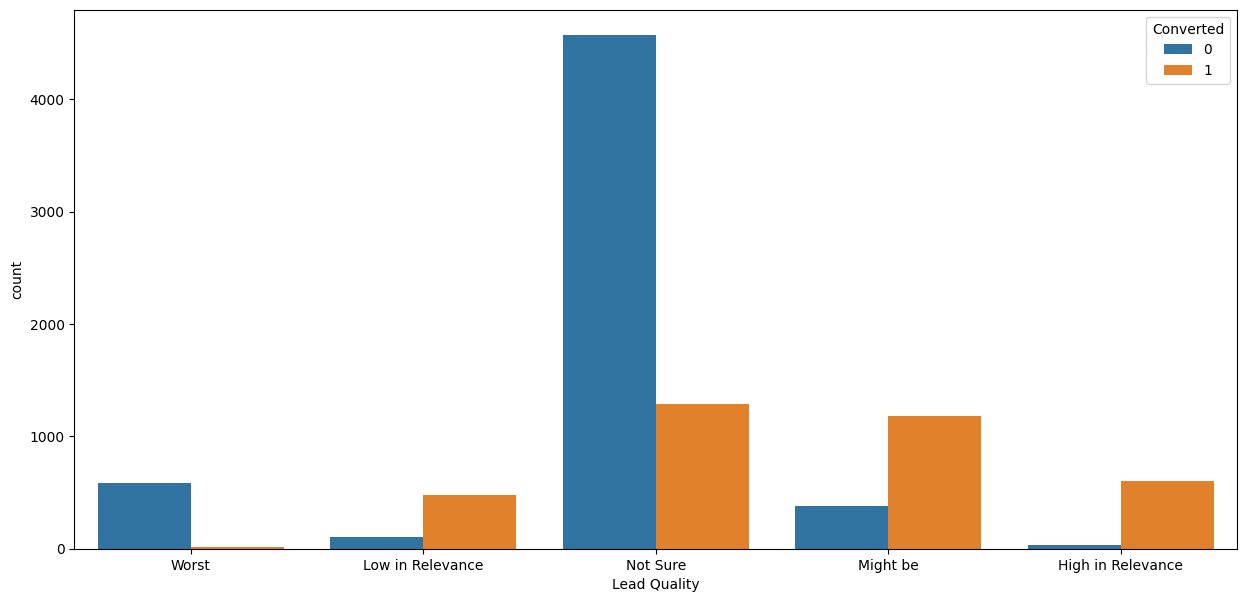

In [1006]:
# Lead Quality
xlabels = ["Worst", "Low in Relevance", "Not Sure", "Might be", "High in Relevance"]

fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(data=df, x="Lead Quality", hue="Converted", order=xlabels)
plt.show()

In [1007]:
# this is the subjective assessment of lead quality by workers
# obviously, "might be " and "high i n relevance" have the best conversion rate 
# funnily enough, "low in relevance" also has a decent conversion

# takeaway: obiously focus on those three quality groups

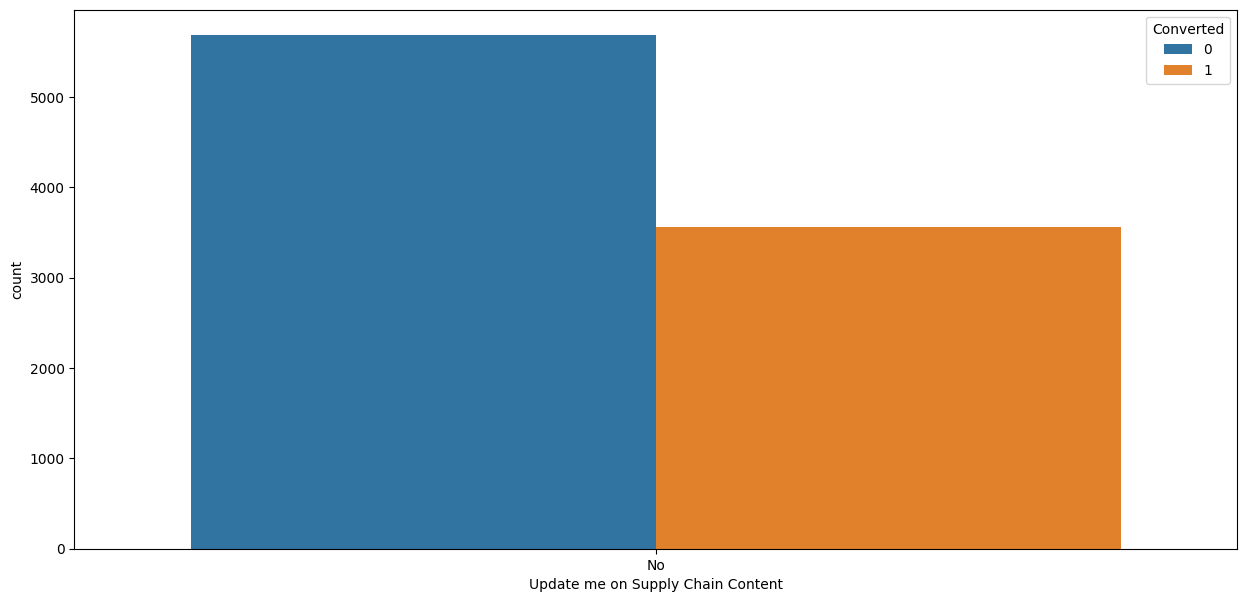

In [1008]:
# Update me on Supply Chain Content
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(data=df, x="Update me on Supply Chain Content", hue="Converted")
plt.show()

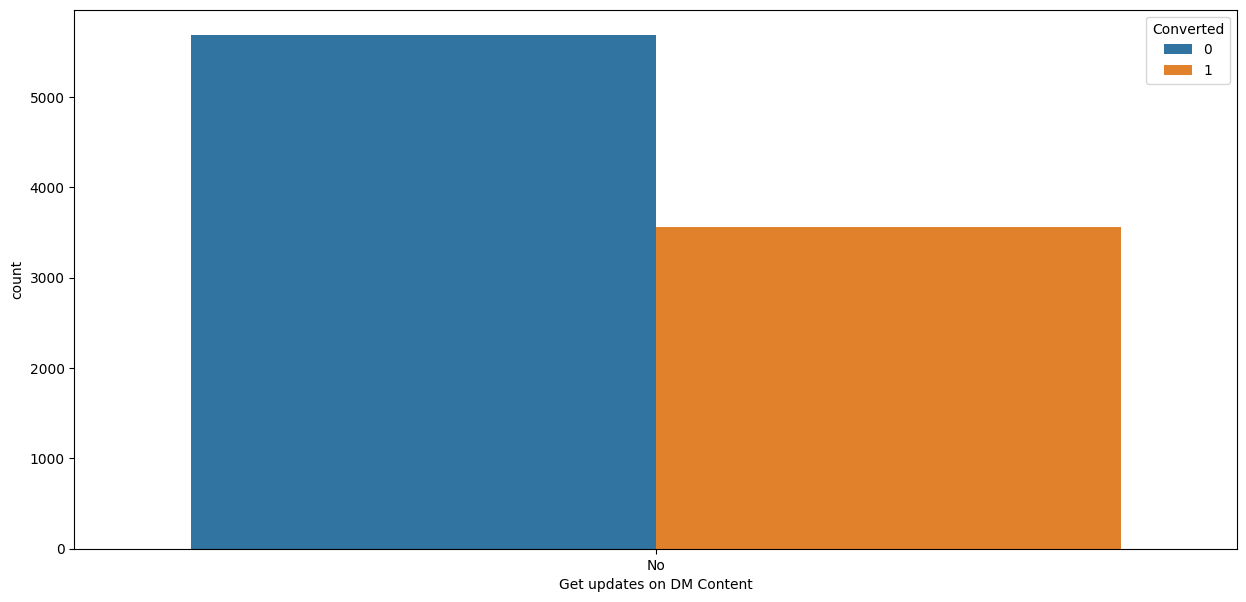

In [1009]:
# Get updates on DM Content
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(data=df, x="Get updates on DM Content", hue="Converted")
plt.show()

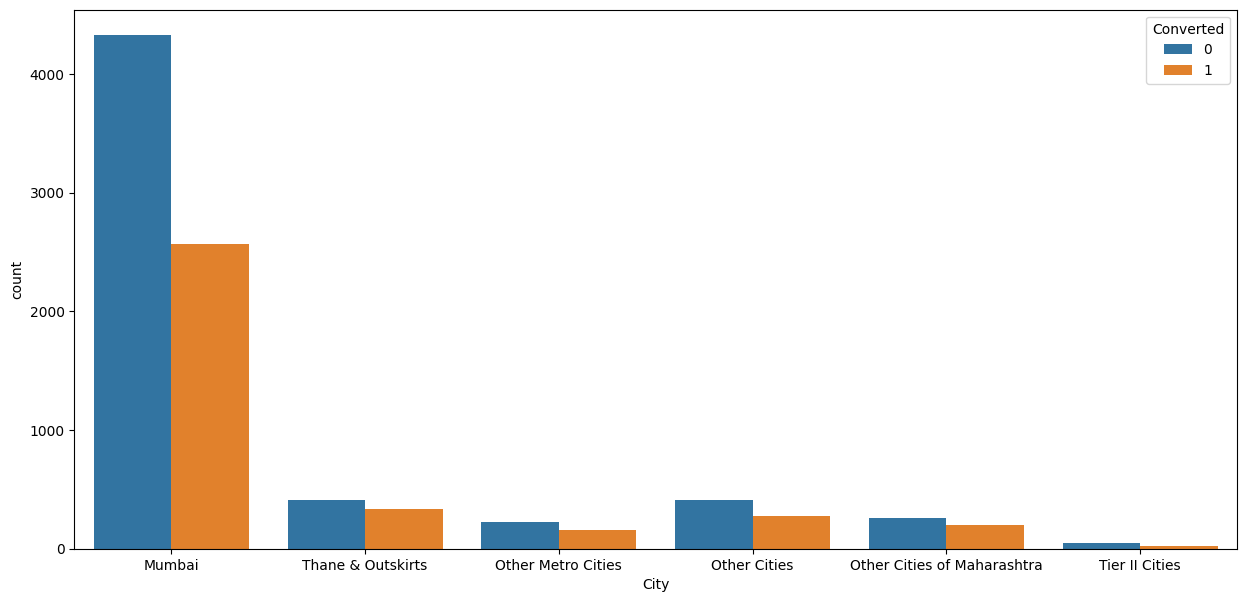

In [1010]:
# City
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(data=df, x="City", hue="Converted")
plt.show()

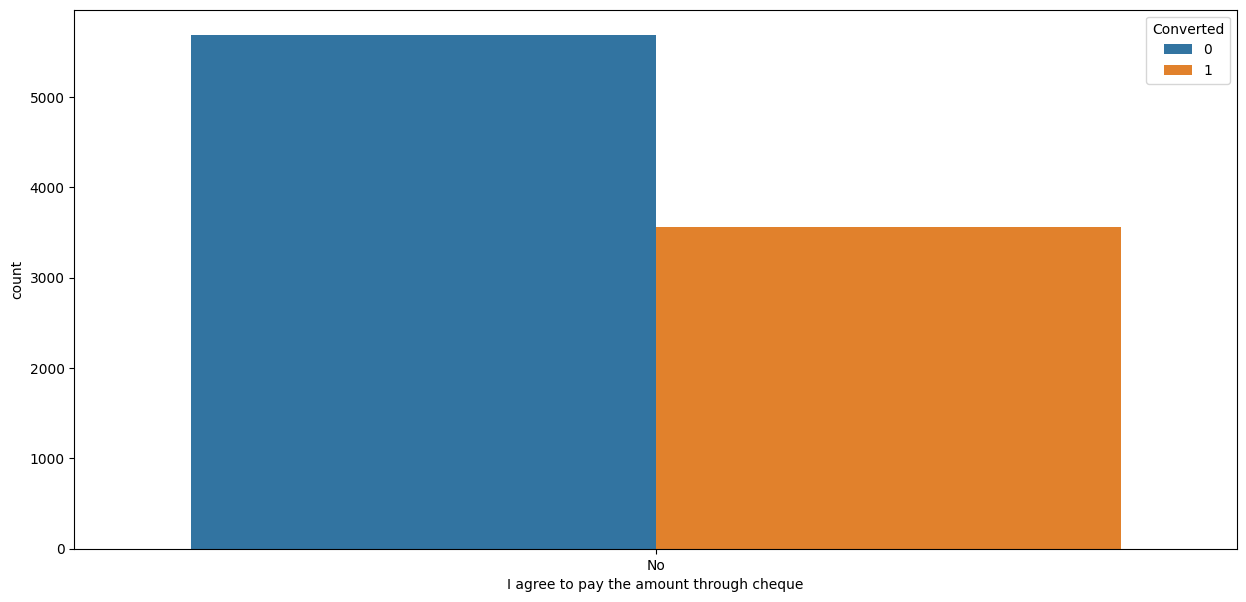

In [1011]:
# I agree to pay the amount through cheque
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(data=df, x="I agree to pay the amount through cheque", hue="Converted")
plt.show()

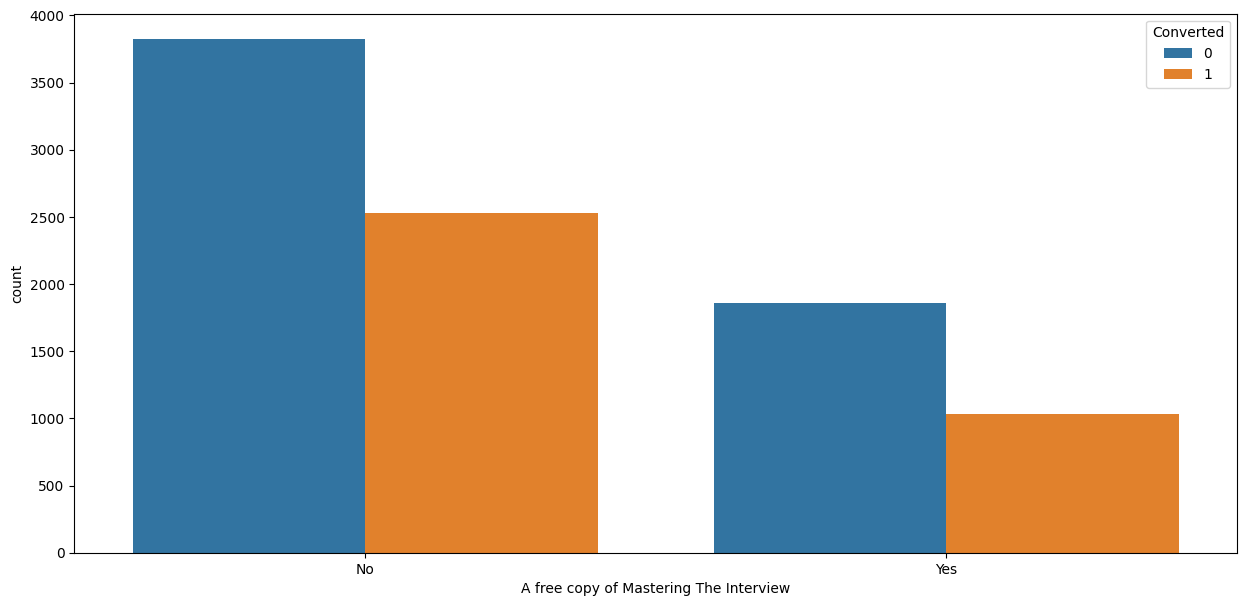

In [1012]:
# A free copy of Mastering The Interview
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(data=df, x="A free copy of Mastering The Interview", hue="Converted")
plt.show()

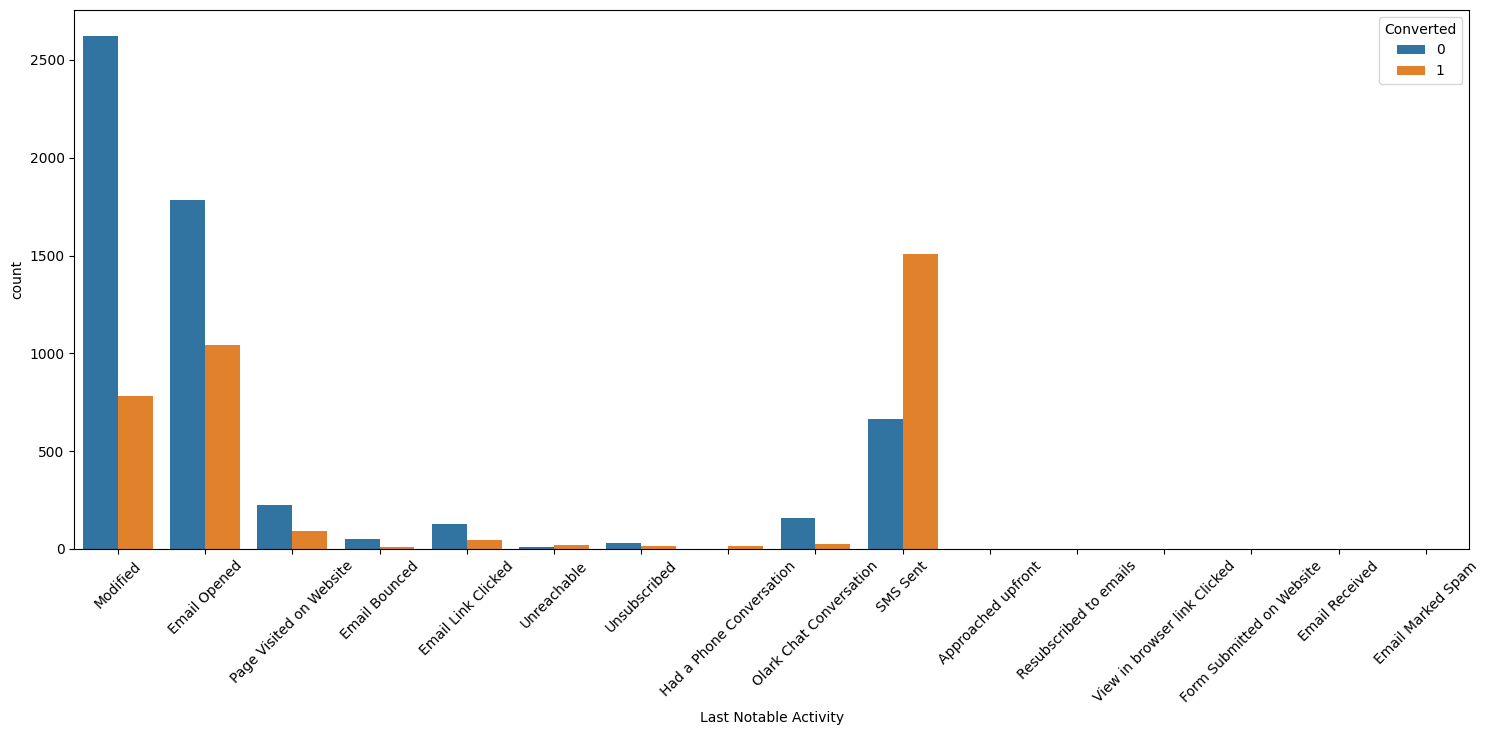

In [1013]:
# Last Notable Activity
fig, ax = plt.subplots(figsize=(18, 7))
sns.countplot(data=df, x="Last Notable Activity", hue="Converted")
plt.xticks(rotation=45)
plt.show()

# Data Transformation

### Drop uninformative Columns

In [1014]:
df.shape

(9240, 31)

In [1015]:
# drop not important columns
df = df.drop(columns=['Prospect ID','Lead Number','What matters most to you in choosing a course','Do Not Email','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                        'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                        'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'])

In [1016]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'City', 'Last Notable Activity'],
      dtype='object')

### Check Correlations

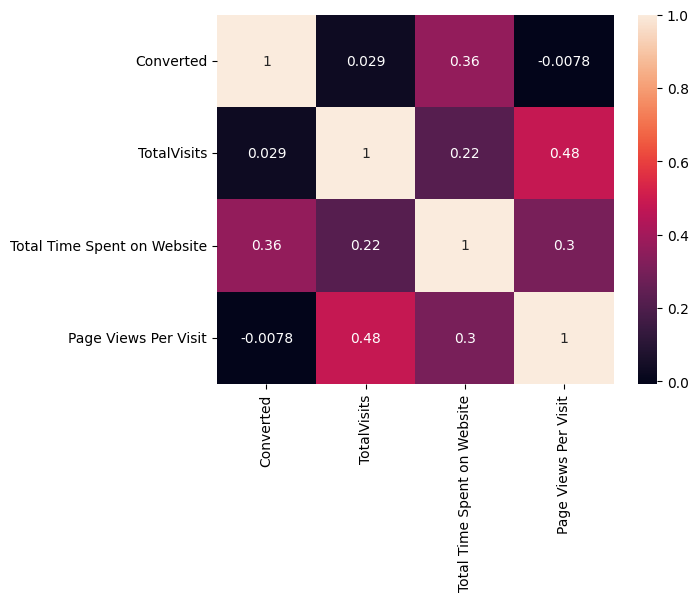

In [1017]:
# check correlations between variables
corr = df.select_dtypes('number').corr()
sns.heatmap(corr, annot=True)
plt.show()

### Encode Categorical Columns


In [1018]:
# check binary columns
df.nunique()

Lead Origin                           5
Lead Source                          20
Do Not Call                           2
Converted                             2
TotalVisits                          41
Total Time Spent on Website        1731
Page Views Per Visit                 19
Last Activity                        17
Specialization                       19
What is your current occupation       6
Tags                                 26
Lead Quality                          5
City                                  6
Last Notable Activity                16
dtype: int64

In [1019]:
df[["Do Not Call", "Converted"]].head()

,Do Not Call,Converted
0,No,0
1,No,0
2,No,1
3,No,0
4,No,1


In [1020]:
# replace yes/no with integers
df["Do Not Call"] = df["Do Not Call"].replace({"No": 0, "Yes": 1})

/var/folders/28/zbzpsxmj0b5c234nq_n82qdw0000gn/T/ipykernel_1531/2902274969.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Do Not Call"] = df["Do Not Call"].replace({"No": 0, "Yes": 1})


In [1021]:
# one hot encode non-binary categorical columns
one_hot = pd.get_dummies(df[["Lead Origin", "Lead Source", "Last Activity", "Specialization", "What is your current occupation", "Tags", "Lead Quality", "City", "Last Notable Activity"]], drop_first=True, dtype=int)

In [1022]:
df = df.join(one_hot)

In [1023]:
df = df.drop(columns=["Lead Origin", "Lead Source", "Last Activity", "Specialization", "What is your current occupation", "Tags", "Lead Quality", "City", "Last Notable Activity"], axis=1)

In [1024]:
df.head()

,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5,674,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2,1532,2,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,305,1,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2,1428,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Scale Discrete Features

In [1025]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
df.head()

,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,-0.713593,-0.889974,-1.064836,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0.324018,0.339972,-0.134558,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,-0.298549,1.905689,-0.134558,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,-0.506071,-0.333396,-0.599697,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,1,-0.298549,1.715905,-0.599697,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Training Preparation

In [1026]:
# split target and feature variables
X = df.drop(["Converted"], axis=1)
y = df["Converted"]

In [1027]:
X.head()

,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,-0.713593,-0.889974,-1.064836,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0.324018,0.339972,-0.134558,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,-0.298549,1.905689,-0.134558,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,-0.506071,-0.333396,-0.599697,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,-0.298549,1.715905,-0.599697,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1028]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1029]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=76)

# Model Building

In [1057]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from catboost import CatBoostClassifier

import shap


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Logistic Regression

In [1065]:
clf = LogisticRegression(random_state=12).fit(X_train, y_train)

In [1047]:
y_pred = clf.predict(X_test)

In [1048]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9227994227994228


In [1049]:
report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1710
           1       0.92      0.88      0.90      1062

    accuracy                           0.92      2772
   macro avg       0.92      0.91      0.92      2772
weighted avg       0.92      0.92      0.92      2772



### Feature Importance

Text(0.5, 1.0, 'Permutation Importance with Standard Deviation')

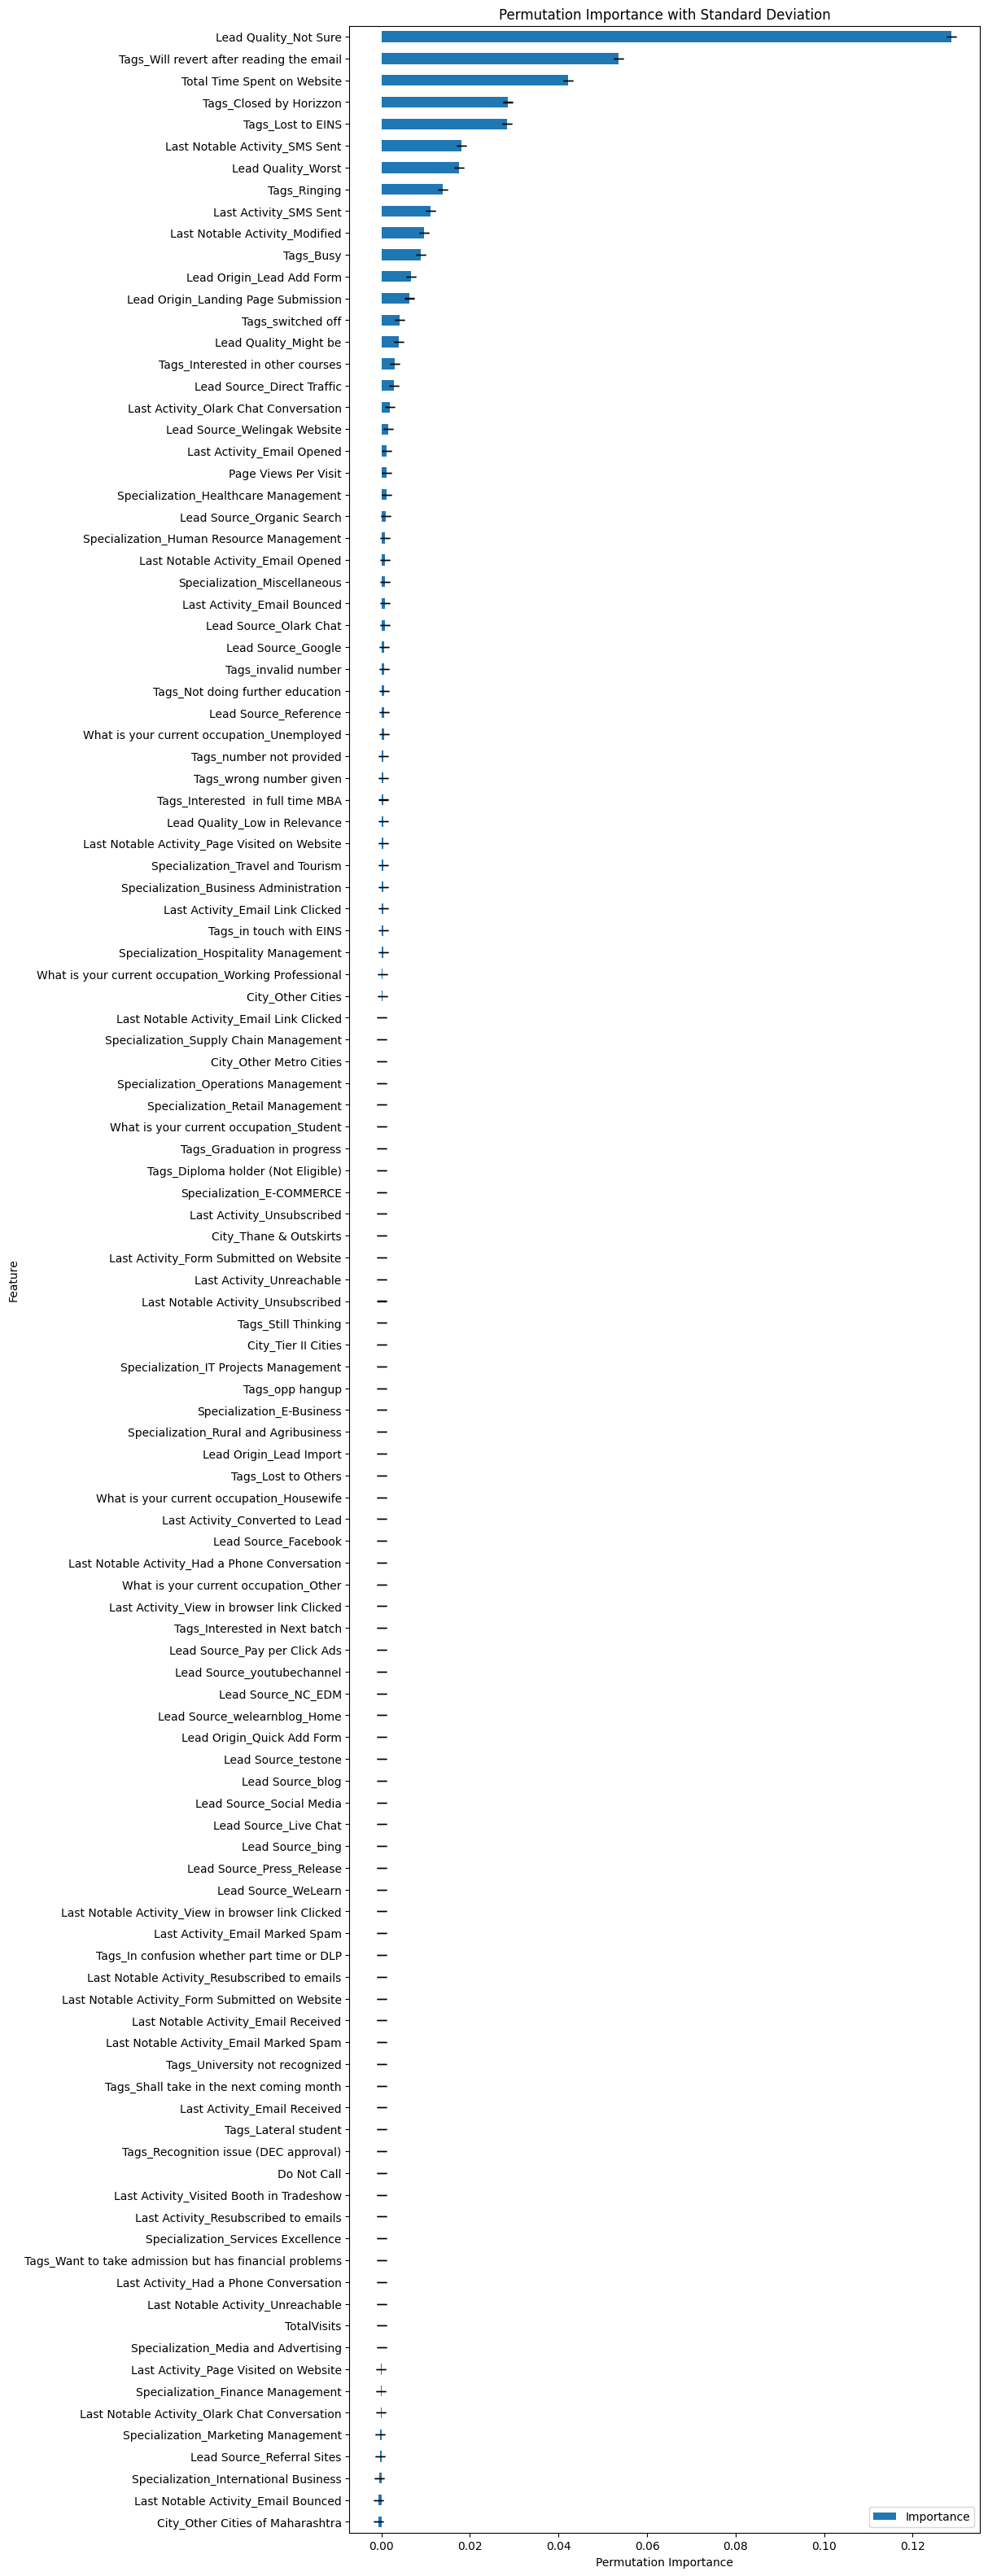

In [1041]:
from sklearn.inspection import permutation_importance

result = permutation_importance(clf, X_test, y_test, n_repeats=20, random_state=25)


feature_importance = pd.DataFrame({'Feature': X.columns,
                                   'Importance': result.importances_mean,
                                   'Standard Deviation': result.importances_std})
feature_importance = feature_importance.sort_values('Importance', ascending=True)


ax = feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 40), yerr='Standard Deviation', capsize=4)
ax.set_xlabel('Permutation Importance')
ax.set_title('Permutation Importance with Standard Deviation')


In [1074]:
explainer = shap.Explainer(clf.predict, X_test)
shap_values = explainer(X_test)

PermutationExplainer explainer: 2773it [00:29, 61.80it/s]                           


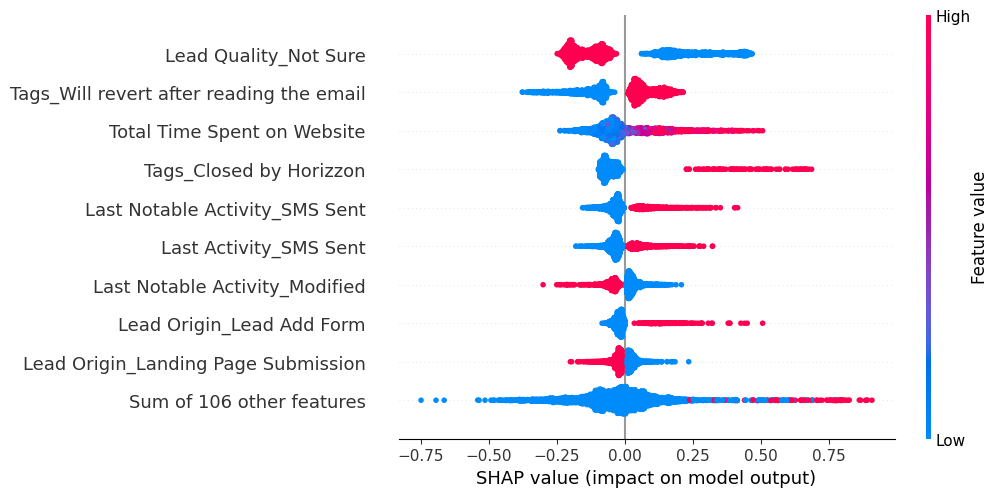

In [1075]:
shap.plots.beeswarm(shap_values)

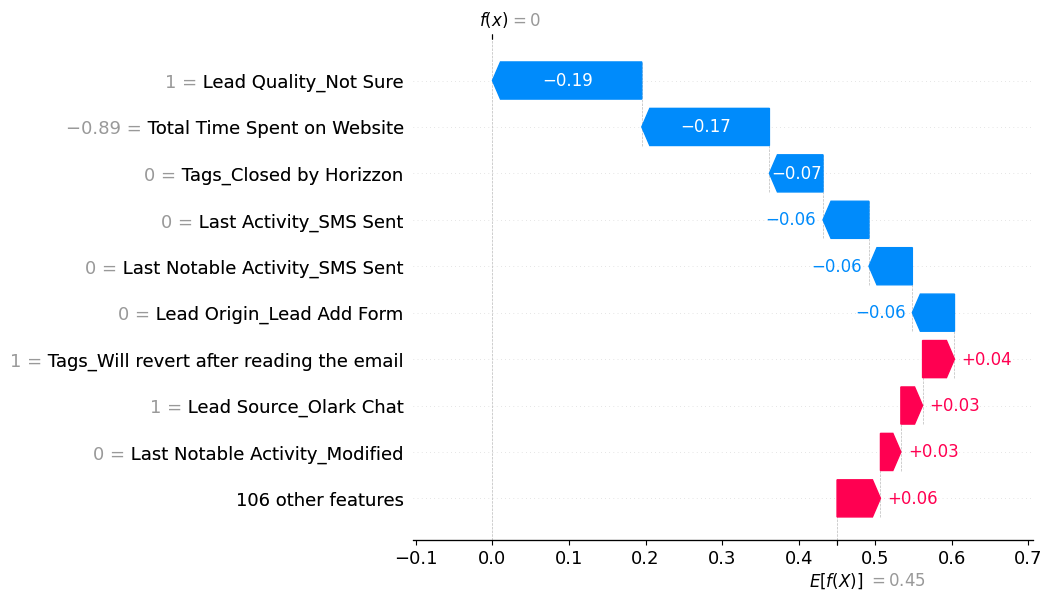

In [1076]:
shap.plots.waterfall(shap_values[0])

### CatBoost Classifier

In [1055]:
# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=1000, 
                           learning_rate=0.01, 
                           depth=4, 
                           eval_metric='Accuracy')

model.fit(X_train, y_train, verbose=False)
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


Accuracy: 0.9296536796536796
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1710
           1       0.94      0.87      0.90      1062

    accuracy                           0.93      2772
   macro avg       0.93      0.92      0.92      2772
weighted avg       0.93      0.93      0.93      2772



In [1077]:
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)

PermutationExplainer explainer: 2773it [00:44, 48.13it/s]                          


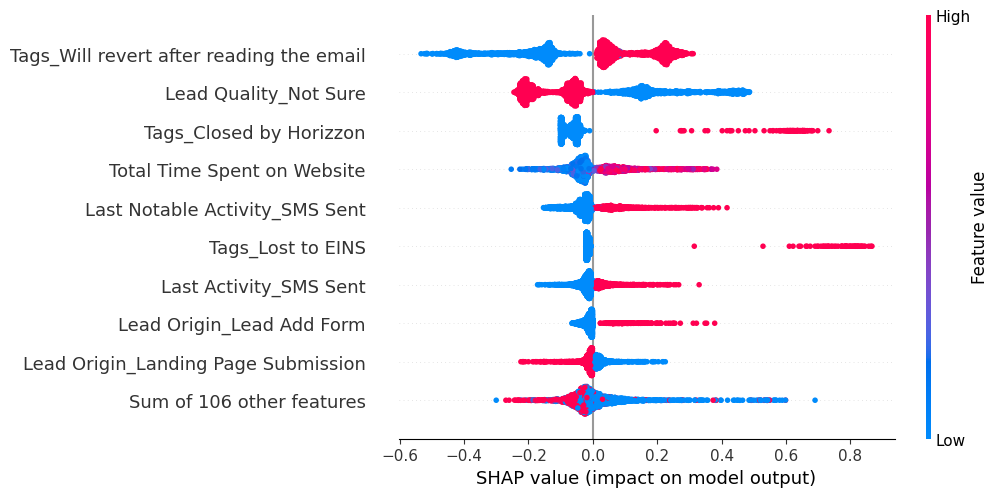

In [1078]:
shap.plots.beeswarm(shap_values)

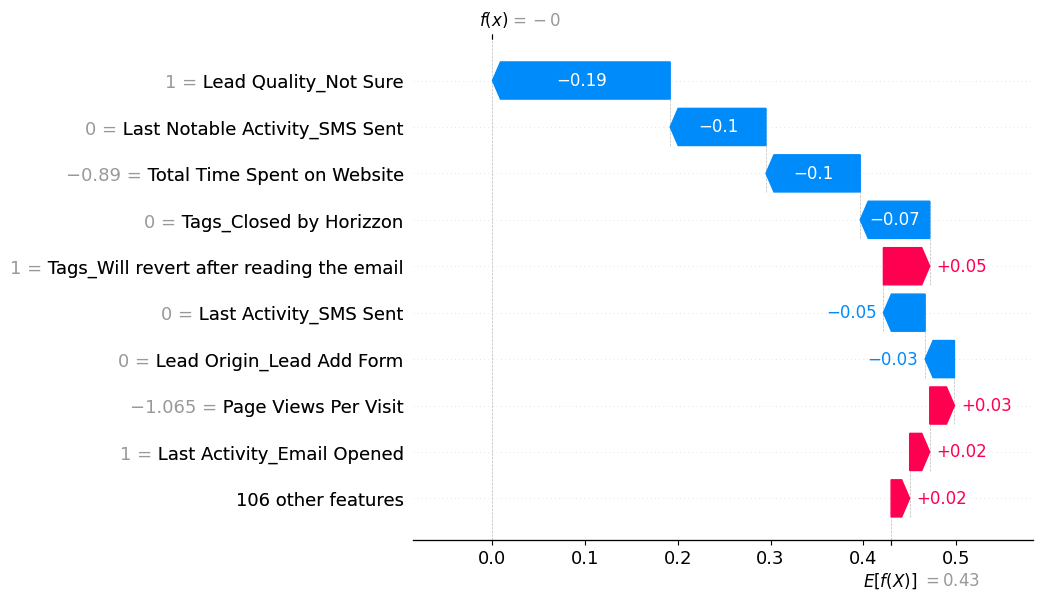

In [1079]:
shap.plots.waterfall(shap_values[0])